In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


In [2]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size      Sample              Group             
1  371718546 Input1_20x          Input             
2   18666630 Input1              Input             
3  347635732 Input2_20x          Input             
4   20167924 Input2              Input             
5  349994051 Input3_20x          Input             
6   23280988 Input3              Input             
7  413508358 Input4_20x          Input             
8   19003938 Input4              Input             
9  341110487 Input5_20x          Input             
10  15325016 Input5              Input             
11  48376253 TFX2_AZD2906        TFX_AZD2906       
12  52542517 TFX2_AZD9567        TFX_AZD9567       
13  43646484 TFX2_CORT108297     TFX_CORT108297    
14  41732268 TFX2_CpdA           TFX_CpdA          
15  45413539 TFX2_Dex            TFX_Dex           
16  43844606 TFX2_DMSO           TFX_DMSO          
17  56207769 TFX2_GW870086       TFX_GW870086      
18  47829936 TFX2_Hydrocortisone TFX_Hydrocortisone
19  38120420 TFX2_Mapracorat     TFX_Mapracorat    
20  47687319 TFX2_RU486          TFX_RU486         
21  45455167 TFX2_ZK216348       TFX_ZK216348      
22  26840149 TFX3_AZD2906        TFX_AZD2906       
23  44435989 TFX3_AZD9567        TFX_AZD9567       
24  32701206 TFX3_CORT108297     TFX_CORT108297    
25  26352610 TFX3_CpdA           TFX_CpdA          
26  26400671 TFX3_Dex            TFX_Dex           
27  26819569 TFX3_DMSO           TFX_DMSO          
28  36774709 TFX3_GW870086       TFX_GW870086      
29  40293787 TFX3_Hydrocortisone TFX_Hydrocortisone
30  26384034 TFX3_Mapracorat     TFX_Mapracorat    
31  31454676 TFX3_RU486          TFX_RU486         
32  41139261 TFX3_ZK216348       TFX_ZK216348      
33  27175305 TFX4_AZD2906        TFX_AZD2906       
34  33610712 TFX4_AZD9567        TFX_AZD9567       
35  59429741 TFX4_CORT108297     TFX_CORT108297    
36  31202573 TFX4_CpdA           TFX_CpdA          
37  34590086 TFX4_Dex            TFX_Dex           
38  30951533 TFX4_DMSO           TFX_DMSO          
39  43395226 TFX4_GW870086       TFX_GW870086      
40  27190016 TFX4_Hydrocortisone TFX_Hydrocortisone
41  36460601 TFX4_Mapracorat     TFX_Mapracorat    
42  31196111 TFX4_RU486          TFX_RU486         
43  38035173 TFX4_ZK216348       TFX_ZK216348      
44  43862195 TFX5_AZD2906        TFX_AZD2906       
45  48356547 TFX5_AZD9567        TFX_AZD9567       
46  42880899 TFX5_CORT108297     TFX_CORT108297    
47  40239413 TFX5_CpdA           TFX_CpdA          
48  42310249 TFX5_Dex            TFX_Dex           
49  28859151 TFX5_DMSO           TFX_DMSO          
50  39710444 TFX5_GW870086       TFX_GW870086      
51  34580732 TFX5_Hydrocortisone TFX_Hydrocortisone
52  48311553 TFX5_Mapracorat     TFX_Mapracorat    
53  49785981 TFX5_RU486          TFX_RU486         
54  35907183 TFX5_ZK216348       TFX_ZK216348

## Import annotated fragments

In [3]:
### set column names and types
CTYPES = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
CNAMES = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

### import data
fdiry = file.path(FD_RES, 'model_linear', 'distance', 'chr17')
fname = "frag_AP1_1_NR_20.tsv"
fpath = file.path(fdiry, fname)
dat_mtf_dist = read_tsv(fpath)
head(dat_mtf_dist)

Rows: 21404218 Columns: 16

── Column specification ─────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): Chrom_Frag, Sample, Motif.x, Motif.y, Motif, Group, X
dbl (9): Start_Frag, End_Frag, Count_Frag, Start_MTF.x, End_MTF.x, Score.x, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Chrom_Frag Start_Frag End_Frag Count_Frag Sample     Motif.x Start_MTF.x
1 chr17      174938     176057   1          Input1_20x AP1/1   174968     
2 chr17      174938     176057   1          Input1_20x AP1/1   174968     
3 chr17      174938     176057   1          Input1_20x AP1/1   175271     
4 chr17      174938     176057   1          Input1_20x AP1/1   175271     
5 chr17      174938     176057   1          Input1_20x AP1/1   175919     
6 chr17      174938     176057   1          Input1_20x AP1/1   175919     
  End_MTF.x Score.x Motif.y Start_MTF.y End_MTF.y Score.y Motif       Group
1 174976    8.0116  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
2 174976    8.0116  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
3 175279    7.6685  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
4 175279    7.6685  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
5 175927    7.8941  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
6 175927    7.8941  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
  X    
1 Input
2 Input
3 Input
4 Input
5 Input
6 Input

## Summary of fragments

In [4]:
dat = dat_mtf_dist %>% dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag) %>% distinct
str(dat)

tibble [8,673,577 × 4] (S3: tbl_df/tbl/data.frame)
 $ Chrom_Frag: chr [1:8673577] "chr17" "chr17" "chr17" "chr17" ...
 $ Start_Frag: num [1:8673577] 174938 175103 204468 204469 204470 ...
 $ End_Frag  : num [1:8673577] 176057 176248 205518 205571 205551 ...
 $ Count_Frag: num [1:8673577] 1 1 1 1 1 1 1 3 1 3 ...


In [5]:
print(dim(dat))
print(sum(dat$Count_Frag))

[1] 8673577       4
[1] 12429148


In [6]:
print(range(dat$Start_Frag))
print(range(dat$End_Frag))

[1]   153773 83243707
[1]   154756 83244806


In [7]:
### double check
tmp = dat_mtf_dist %>% dplyr::select(Chrom_Frag, Start_Frag, End_Frag) %>% distinct
print(dim(tmp))

[1] 7154018       3


In [8]:
### check pairs
dat = dat_mtf_dist %>% dplyr::filter(Sample == "TFX2_DMSO") #%>%
    #dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Motif.x, Motif.y)
print(dim(dat))

[1] 579987     16


In [9]:
tmp = dat %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Motif.x, Motif.y) %>% 
    summarize(Count = n(), .groups = 'drop')
print(dim(tmp))

[1] 289723      6


In [10]:
head(tmp)

Chrom_Frag Start_Frag End_Frag Motif.x Motif.y Count
1 chr17      204458     205338   AP1/1   NR/20   2    
2 chr17      204459     205298   AP1/1   NR/20   2    
3 chr17      204463     205428   AP1/1   NR/20   2    
4 chr17      225114     226080   AP1/1   NR/20   4    
5 chr17      404684     405828   AP1/1   NR/20   1    
6 chr17      404685     405828   AP1/1   NR/20   1

In [11]:
dat %>% dplyr::filter(Start_Frag == 225114, End_Frag == 226080)

Chrom_Frag Start_Frag End_Frag Count_Frag Sample    Motif.x Start_MTF.x
1 chr17      225114     226080   1          TFX2_DMSO AP1/1   225438     
2 chr17      225114     226080   1          TFX2_DMSO AP1/1   225584     
3 chr17      225114     226080   1          TFX2_DMSO AP1/1   225704     
4 chr17      225114     226080   1          TFX2_DMSO AP1/1   226041     
  End_MTF.x Score.x Motif.y Start_MTF.y End_MTF.y Score.y Motif       Group   
1 225447    8.03545 NR/20   225530      225544    7.7644  AP1/1_NR/20 TFX_DMSO
2 225592    7.20330 NR/20   225530      225544    7.7644  AP1/1_NR/20 TFX_DMSO
3 225712    6.73210 NR/20   225530      225544    7.7644  AP1/1_NR/20 TFX_DMSO
4 226049    6.48910 NR/20   225530      225544    7.7644  AP1/1_NR/20 TFX_DMSO
  X                   
1 TFX_DMSO_AP1/1_NR/20
2 TFX_DMSO_AP1/1_NR/20
3 TFX_DMSO_AP1/1_NR/20
4 TFX_DMSO_AP1/1_NR/20

## Calculate motif distance 

In [12]:
dat_test = dat_mtf_dist %>% 
    mutate(Dist_MTF_val1 = abs(Start_MTF.x - Start_MTF.y)) %>%
    mutate(Dist_MTF_val2 = abs((Start_MTF.x + End_MTF.x)/2 - 
                               (Start_MTF.y + End_MTF.y)/2)) %>%
    mutate(Dist_MTF_val3 =  Start_MTF.x - Start_MTF.y) %>%
    mutate(Dist_MTF_val4 = (Start_MTF.x + End_MTF.x)/2 - 
                           (Start_MTF.y + End_MTF.y)/2)
head(dat_test)

Chrom_Frag Start_Frag End_Frag Count_Frag Sample     Motif.x Start_MTF.x
1 chr17      174938     176057   1          Input1_20x AP1/1   174968     
2 chr17      174938     176057   1          Input1_20x AP1/1   174968     
3 chr17      174938     176057   1          Input1_20x AP1/1   175271     
4 chr17      174938     176057   1          Input1_20x AP1/1   175271     
5 chr17      174938     176057   1          Input1_20x AP1/1   175919     
6 chr17      174938     176057   1          Input1_20x AP1/1   175919     
  End_MTF.x Score.x Motif.y Start_MTF.y End_MTF.y Score.y Motif       Group
1 174976    8.0116  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
2 174976    8.0116  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
3 175279    7.6685  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
4 175279    7.6685  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
5 175927    7.8941  NR/20   175700      175714    7.3894  AP1/1_NR/20 Input
6 175927    7.8941  NR/20   175776      175790    8.5107  AP1/1_NR/20 Input
  X     Dist_MTF_val1 Dist_MTF_val2 Dist_MTF_val3 Dist_MTF_val4
1 Input 732           735           -732          -735         
2 Input 808           811           -808          -811         
3 Input 429           432           -429          -432         
4 Input 505           508           -505          -508         
5 Input 219           216            219           216         
6 Input 143           140            143           140

In [13]:
print(range(dat_test$Dist_MTF_val1))
print(range(dat_test$Dist_MTF_val2))
print(range(dat_test$Dist_MTF_val3))
print(range(dat_test$Dist_MTF_val4))

[1]    0 2329
[1]    1.0 2325.5
[1] -2312  2329
[1] -2315.0  2325.5


In [14]:
dat_test %>% dplyr::filter(Dist_MTF_val1 == 0) %>% head(3)

Chrom_Frag Start_Frag End_Frag Count_Frag Sample     Motif.x Start_MTF.x
1 chr17      8915663    8916721  1          Input1_20x AP1/1   8916590    
2 chr17      8915678    8916771  1          Input1_20x AP1/1   8916590    
3 chr17      8915689    8916695  1          Input1_20x AP1/1   8916590    
  End_MTF.x Score.x Motif.y Start_MTF.y End_MTF.y Score.y Motif       Group
1 8916598   7.2825  NR/20   8916590     8916604   7.9298  AP1/1_NR/20 Input
2 8916598   7.2825  NR/20   8916590     8916604   7.9298  AP1/1_NR/20 Input
3 8916598   7.2825  NR/20   8916590     8916604   7.9298  AP1/1_NR/20 Input
  X     Dist_MTF_val1 Dist_MTF_val2 Dist_MTF_val3 Dist_MTF_val4
1 Input 0             3             0             -3           
2 Input 0             3             0             -3           
3 Input 0             3             0             -3

## Visualize raw values

In [15]:
SAMPLES = c(
    #paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [16]:
set.seed(1234)
dat1 = dat_test %>% sample_n(100000)
dat2 = dat_test %>% sample_n(100000)

dat1$Sample = factor(dat1$Sample, levels=SAMPLES)
dat2$Sample = factor(dat2$Sample, levels=SAMPLES)

print(dim(dat1))
print(dim(dat2))

[1] 100000     20
[1] 100000     20


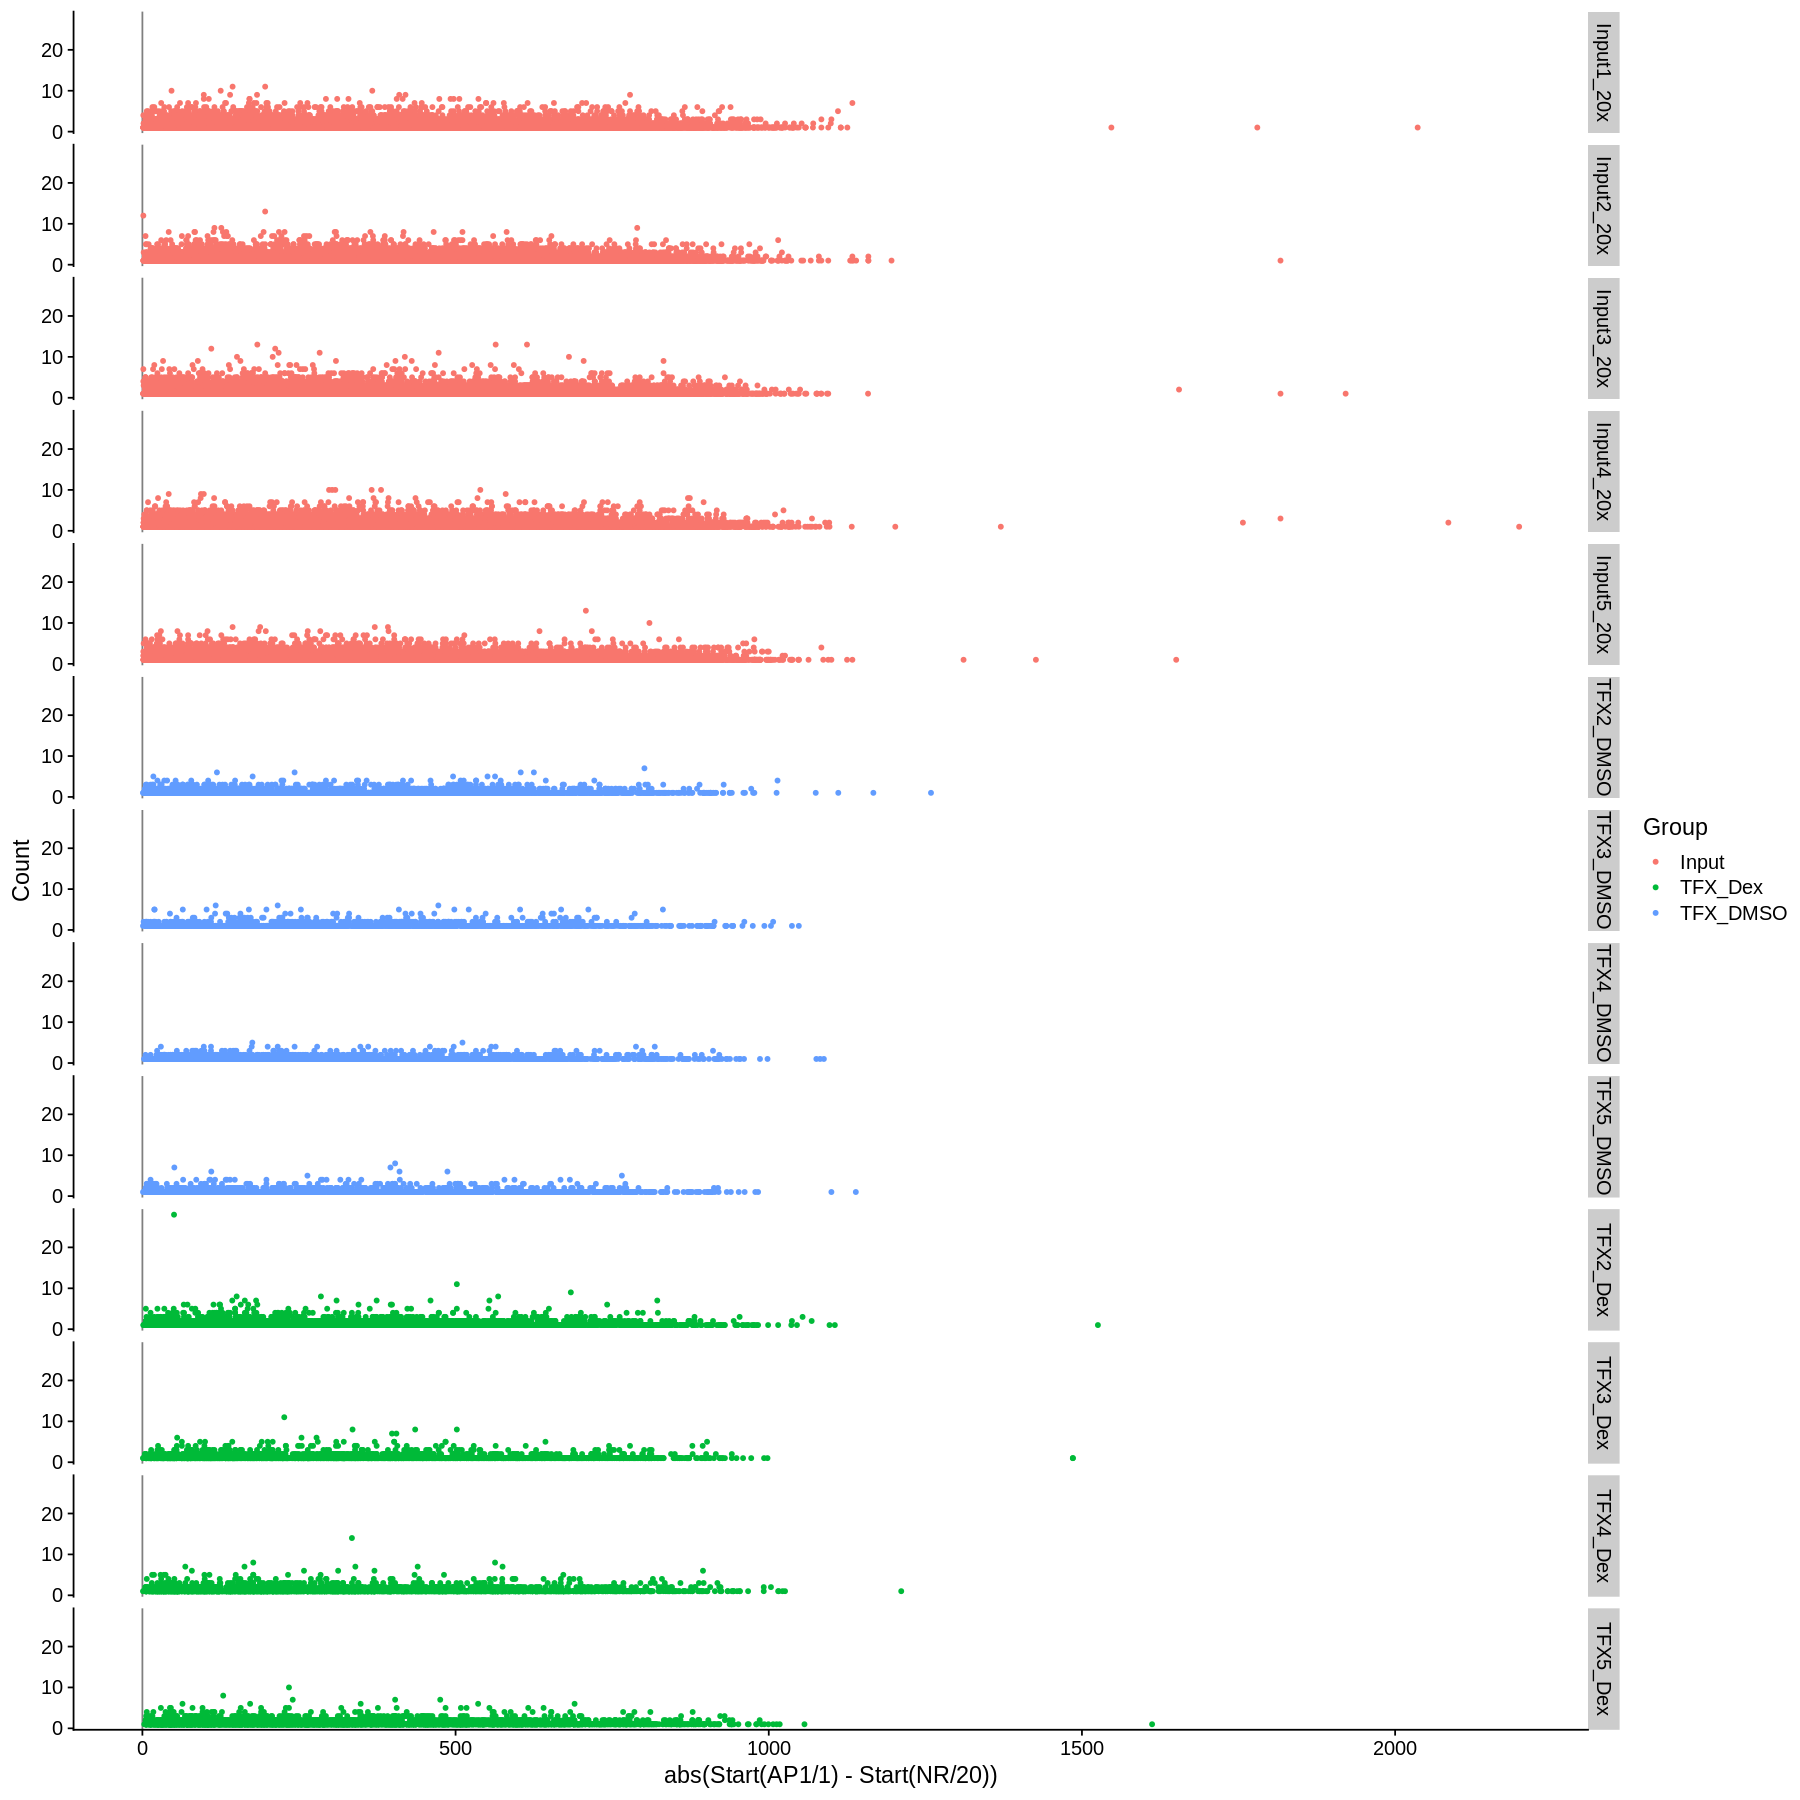

In [17]:
gpt = ggplot(dat1, aes(x=Dist_MTF_val2, y=Count_Frag, color=Group)) + 
    geom_vline(xintercept = 0, color="grey50") +    
    geom_point(size=1.0) + 
    labs(x = "abs(Start(AP1/1) - Start(NR/20))", y = "Count") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.width=15, repr.plot.height=15)
print(gpt)

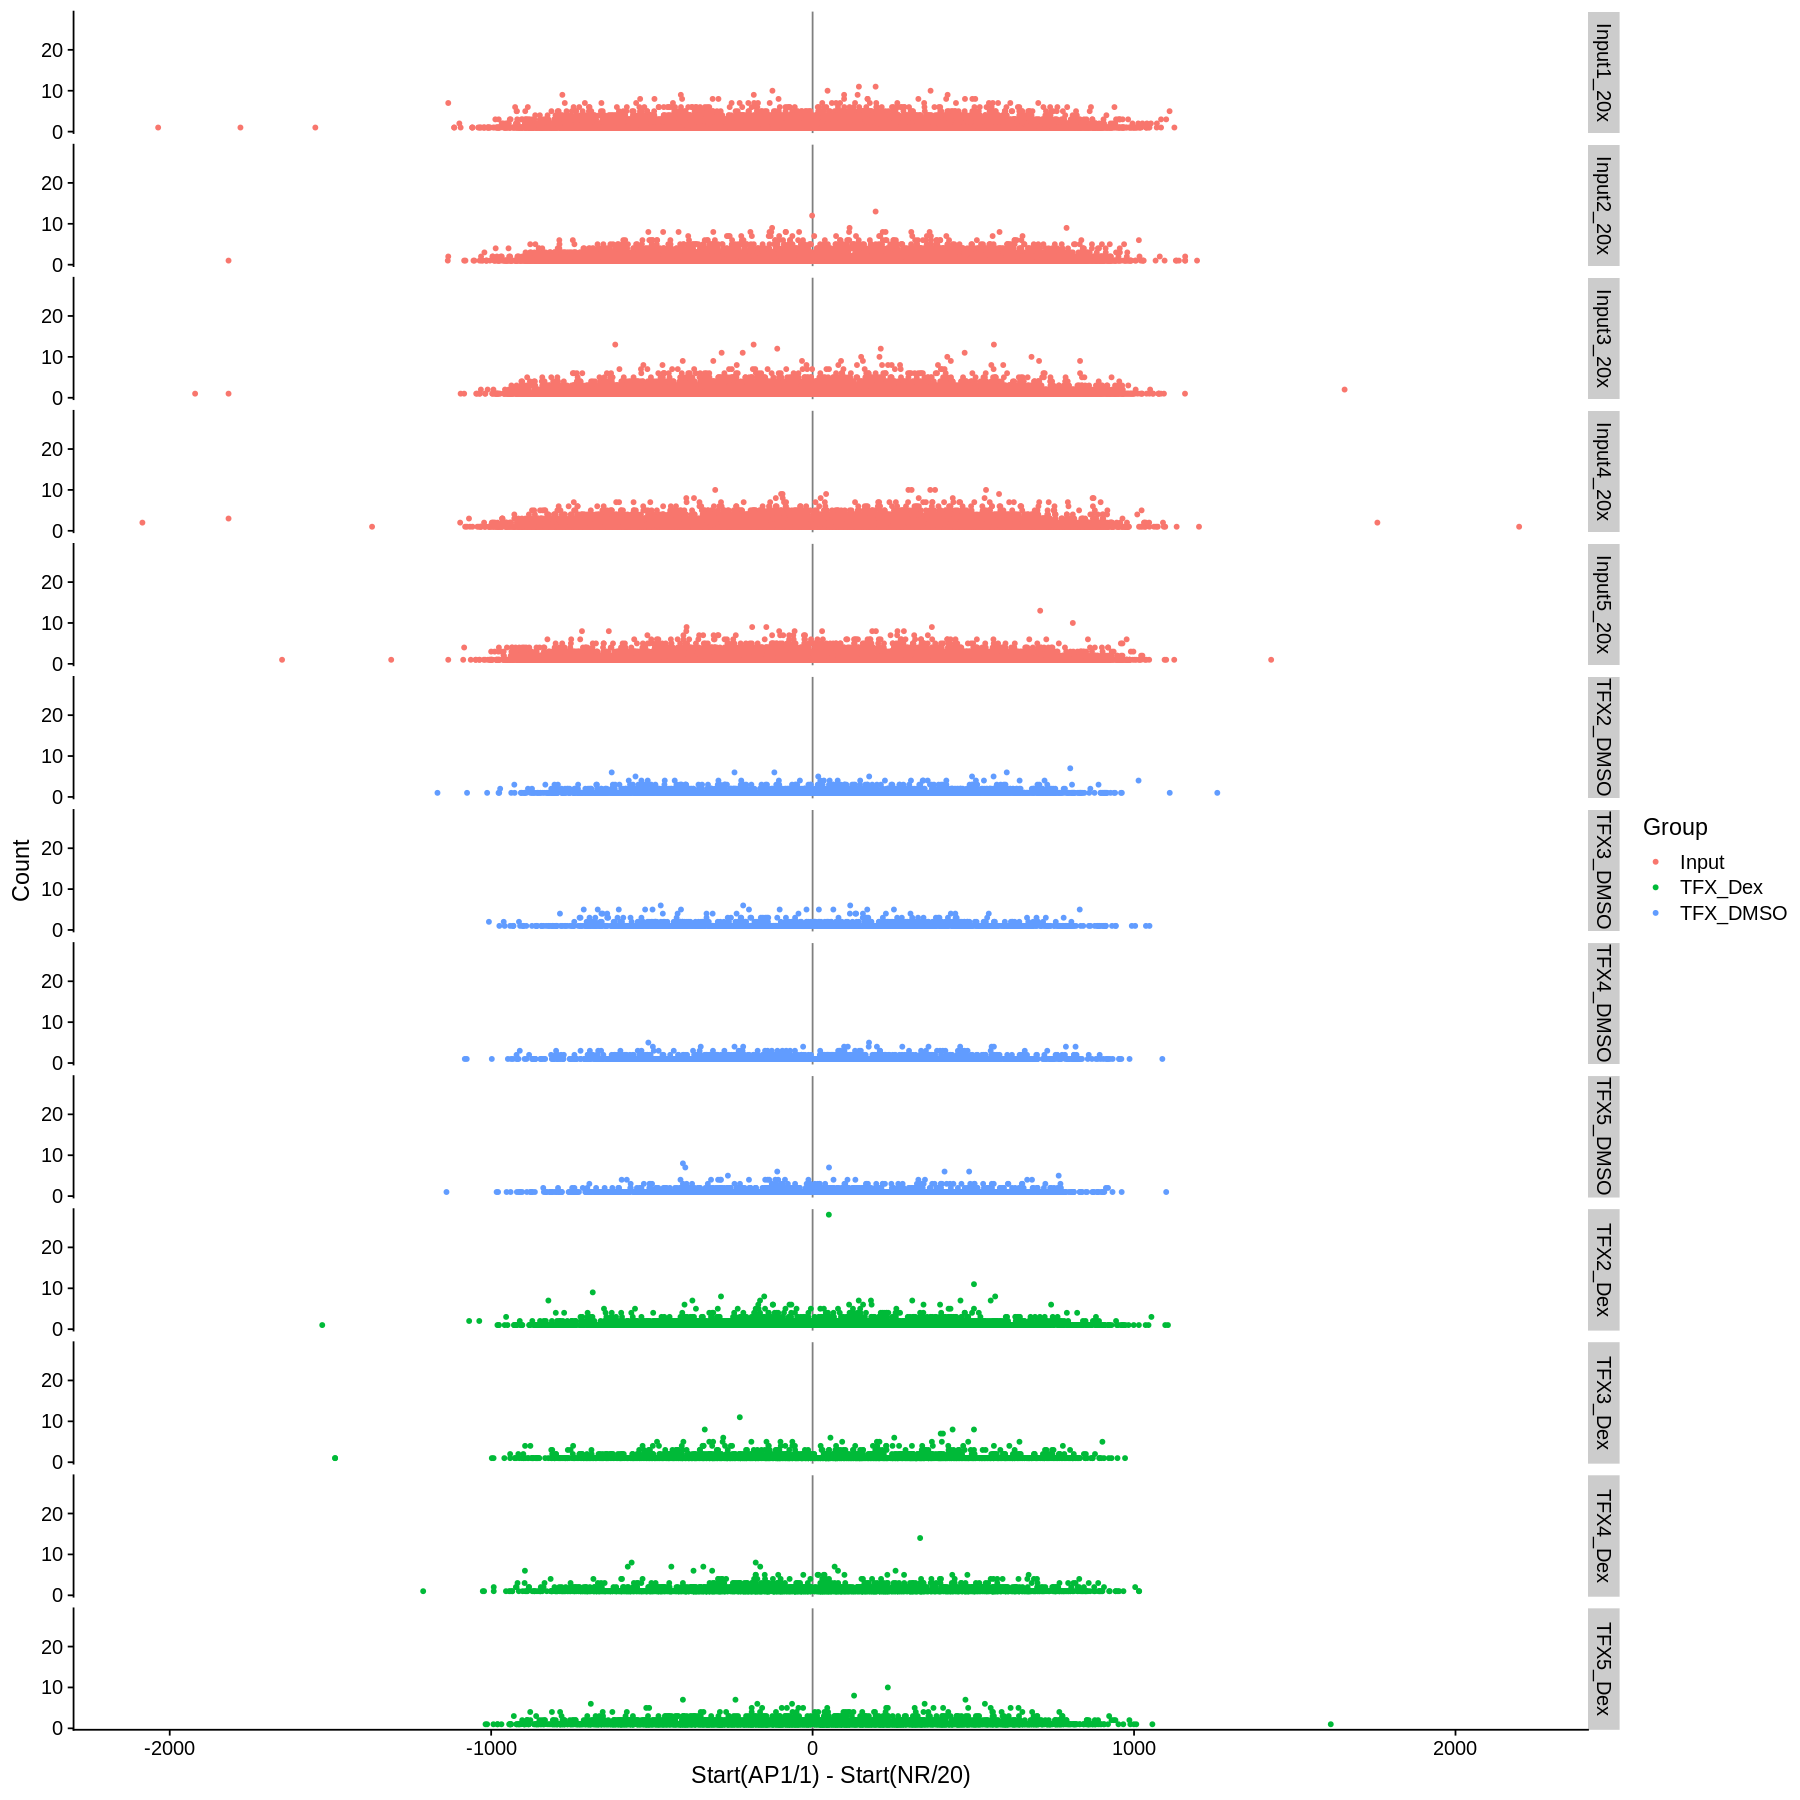

In [18]:
gpt = ggplot(dat1, aes(x=Dist_MTF_val4, y=Count_Frag, color=Group)) + 
    geom_vline(xintercept = 0, color="grey50") +    
    geom_point(size=1.0) + 
    labs(x = "Start(AP1/1) - Start(NR/20)", y = "Count") +
    theme_cowplot() +
    facet_grid(Sample~.)

options(repr.plot.width=15, repr.plot.height=15)
print(gpt)

## Visualize distribution of motif distance

In [26]:
dat1 = dat_test %>%
    group_by(Sample, Group, Dist_MTF_val1) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop')

dat2 = dat_test %>%
    group_by(Sample, Group, Dist_MTF_val2) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop')

Warning message:
“Removed 13835 rows containing missing values (geom_point).”
Warning message:
“Removed 25157 rows containing missing values (geom_point).”


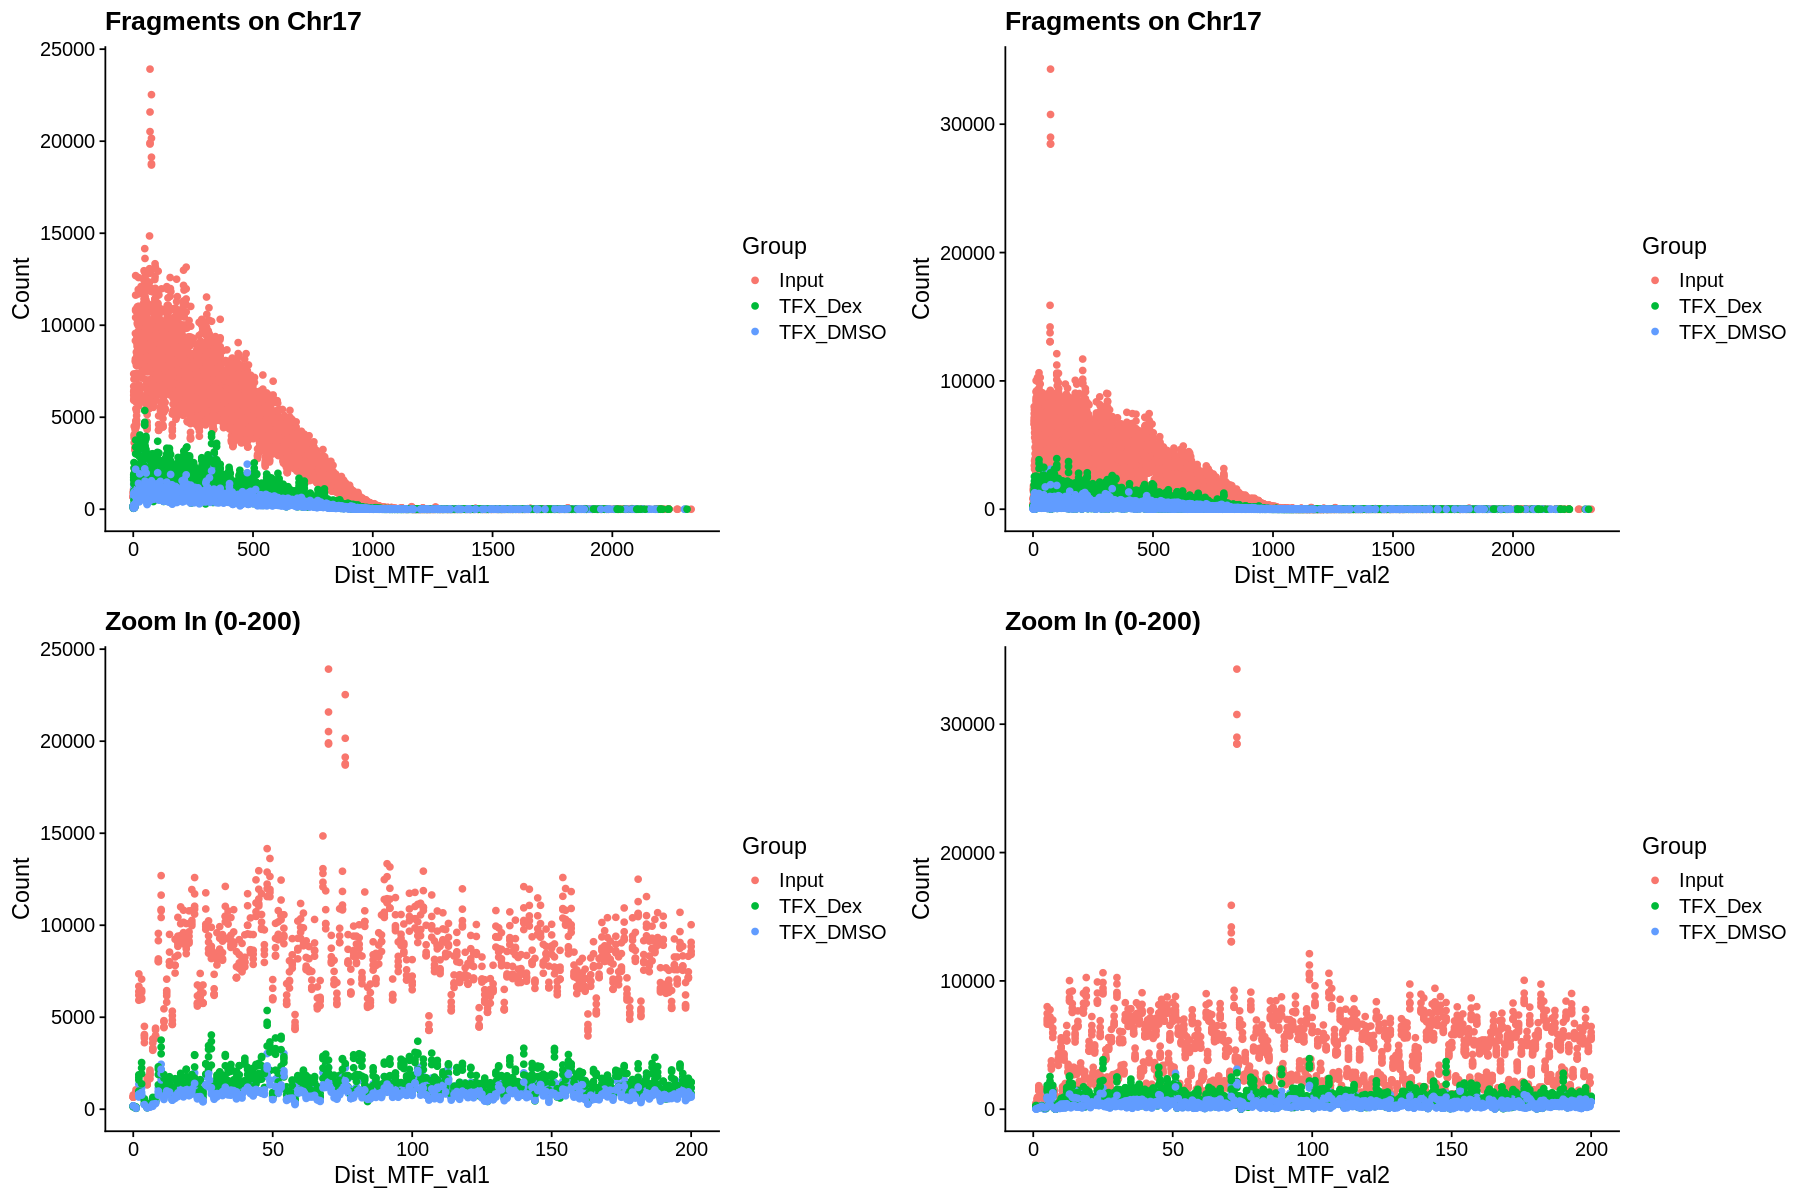

In [27]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_val1, y=Value, color=Group)) + geom_point() + theme_cowplot()
gp2 = ggplot(dat2, aes(x=Dist_MTF_val2, y=Value, color=Group)) + geom_point() + theme_cowplot()

options(repr.plot.width=15, repr.plot.height=10)
plot_grid(gp1 + labs(y="Count", title="Fragments on Chr17"), 
          gp2 + labs(y="Count", title="Fragments on Chr17"),
          gp1 + labs(y="Count", title="Zoom In (0-200)") + xlim(0, 200), 
          gp2 + labs(y="Count", title="Zoom In (0-200)") + xlim(0, 200), 
          nrow=2, ncol=2)

In [23]:
dat = dat_test %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(    0,2400,by=100), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(    0,2400,by=100), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-2400,2400,by=100), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-2400,2400,by=100), include.lowest=TRUE, right=FALSE))

dat1 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat2) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat4) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [24]:
length(unique(dat$Dist_MTF_cat3))

[1] 48

In [25]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Value,         color=Group))
gp2 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Value,         color=Group))
gp3 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Norm_Value,    color=Group))
gp4 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Norm_Value,    color=Group))
gp5 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Lognorm_Value, color=Group))
gp6 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Lognorm_Value, color=Group))

lst_gpt = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt +
        geom_point() + 
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
})

lst_gpt[[2]] = lst_gpt[[2]] + geom_vline(xintercept=24.5, color="grey50")
lst_gpt[[4]] = lst_gpt[[4]] + geom_vline(xintercept=24.5, color="grey50")
lst_gpt[[6]] = lst_gpt[[6]] + geom_vline(xintercept=24.5, color="grey50")

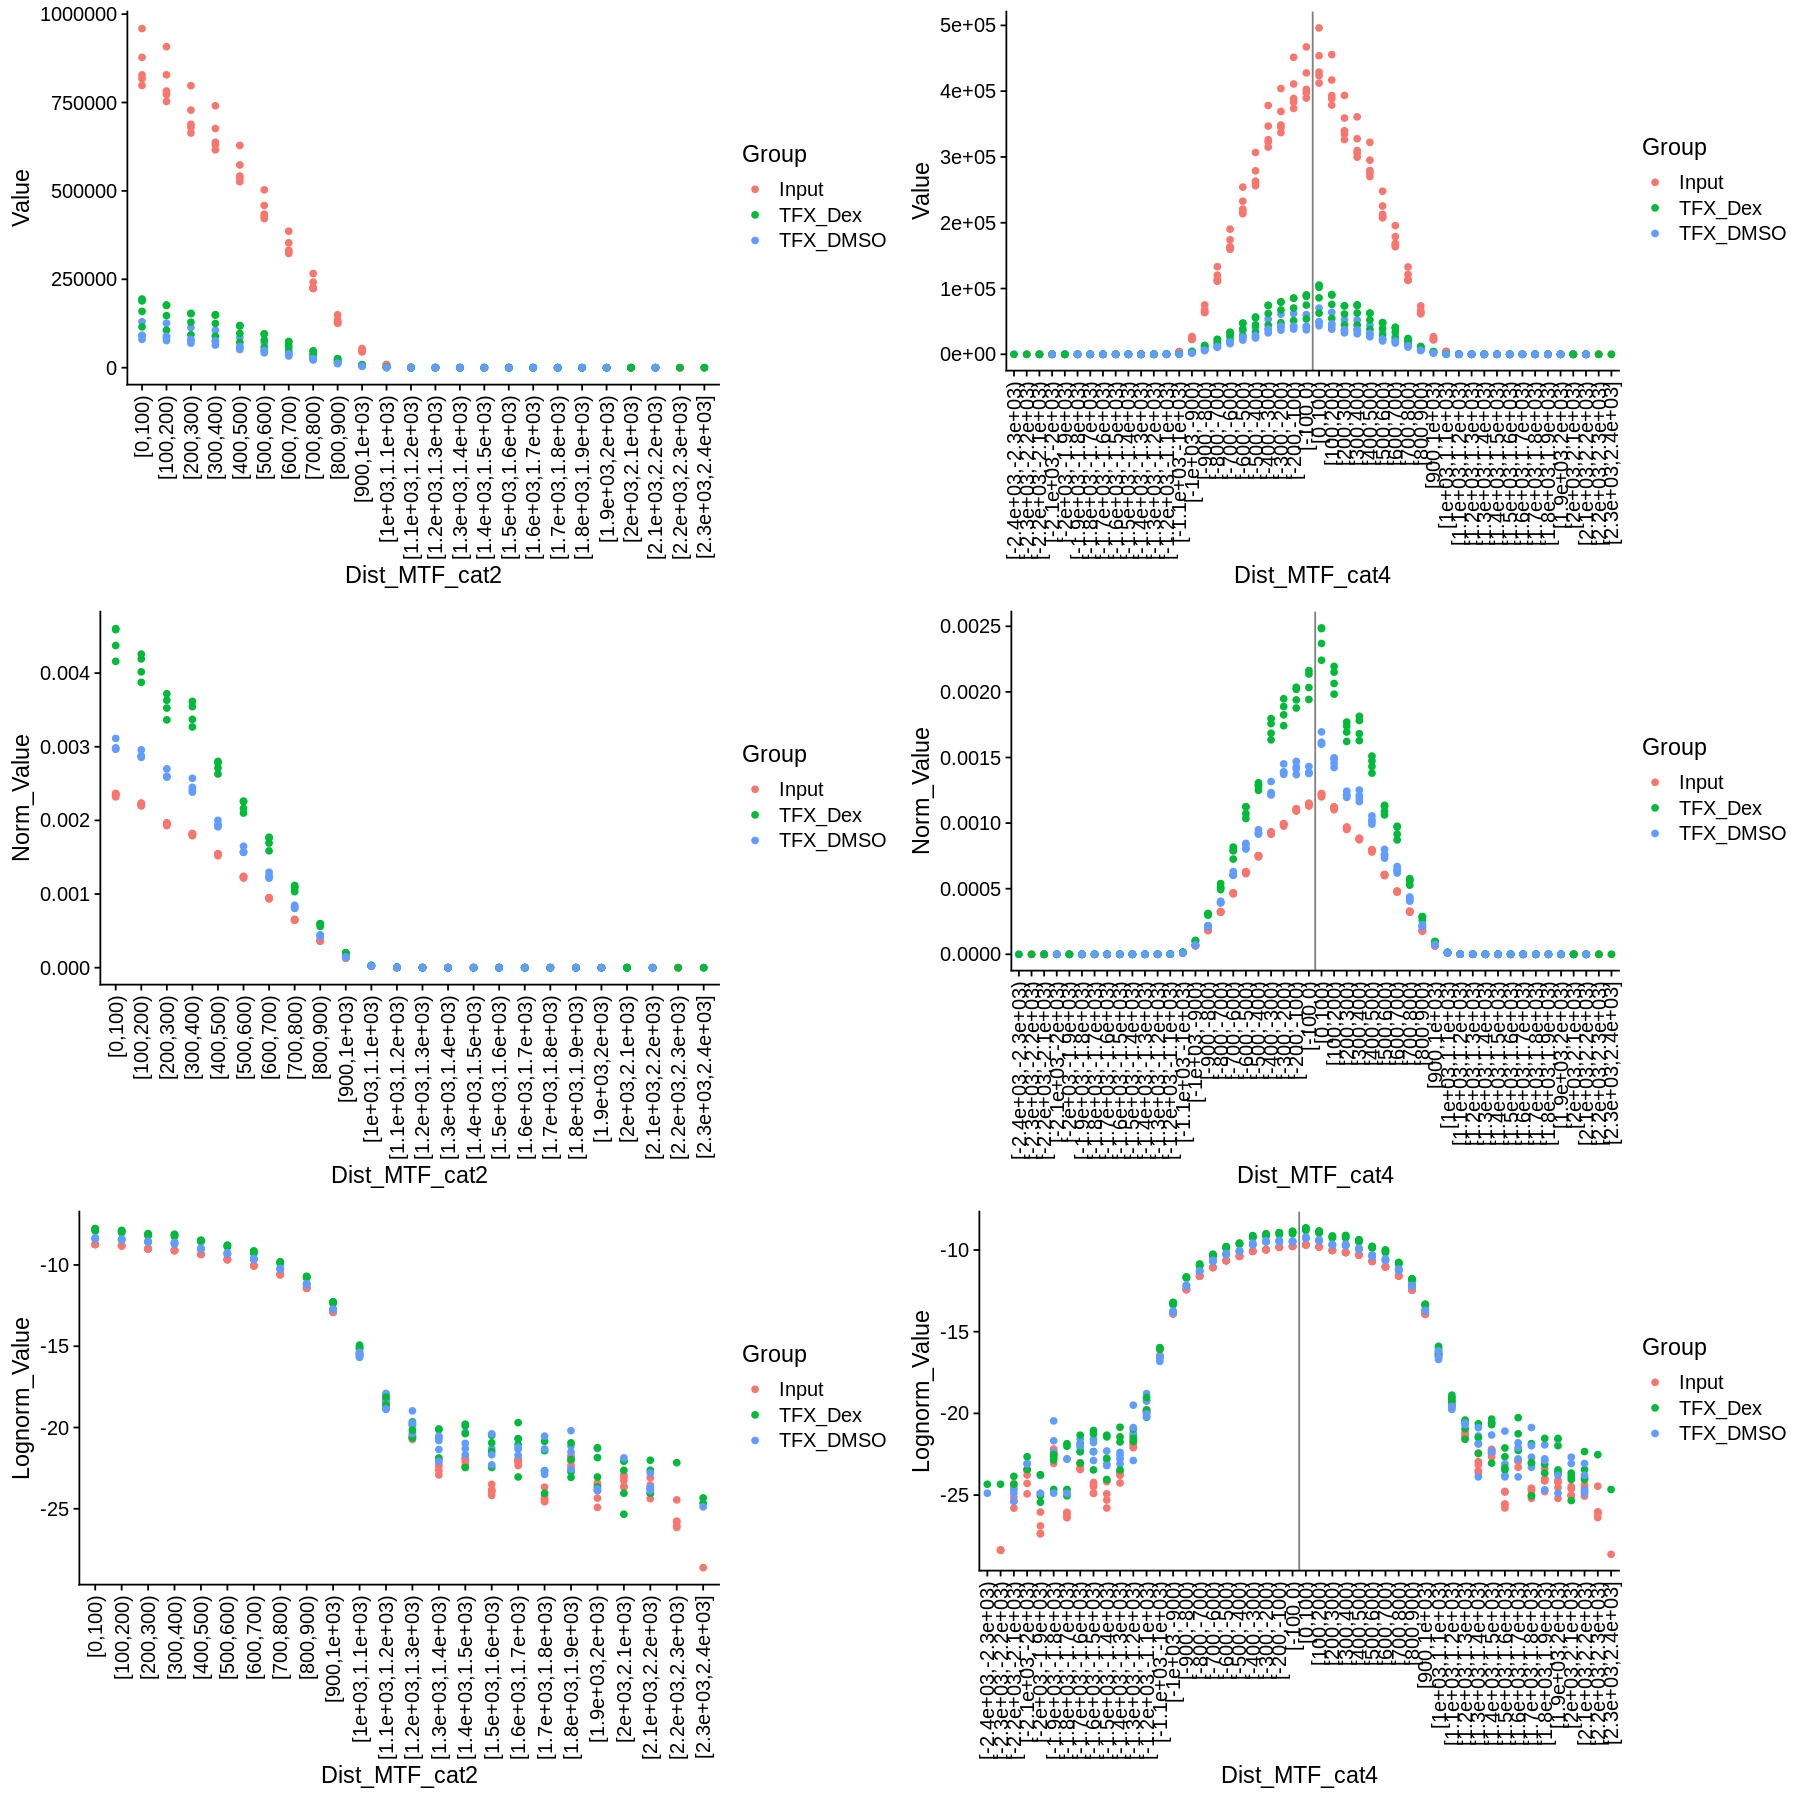

In [26]:
options(repr.plot.width=15, repr.plot.height=15)
plot_grid(plotlist = lst_gpt, ncol=2)

In [76]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 500) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,500,by=50), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,500,by=50), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-500,500,by=50), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-500,500,by=50), include.lowest=TRUE, right=FALSE))

dat1 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat1) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat3) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [77]:
length(unique(dat$Dist_MTF_cat3))

[1] 20

In [78]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Value,         color=Group))
gp2 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Value,         color=Group))
gp3 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Norm_Value,    color=Group))
gp4 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Norm_Value,    color=Group))
gp5 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Lognorm_Value, color=Group))
gp6 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Lognorm_Value, color=Group))

lst_gpt = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt +
        geom_point() + 
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
})

lst_gpt[[2]] = lst_gpt[[2]] + geom_vline(xintercept=10.5, color="grey50")
lst_gpt[[4]] = lst_gpt[[4]] + geom_vline(xintercept=10.5, color="grey50")
lst_gpt[[6]] = lst_gpt[[6]] + geom_vline(xintercept=10.5, color="grey50")

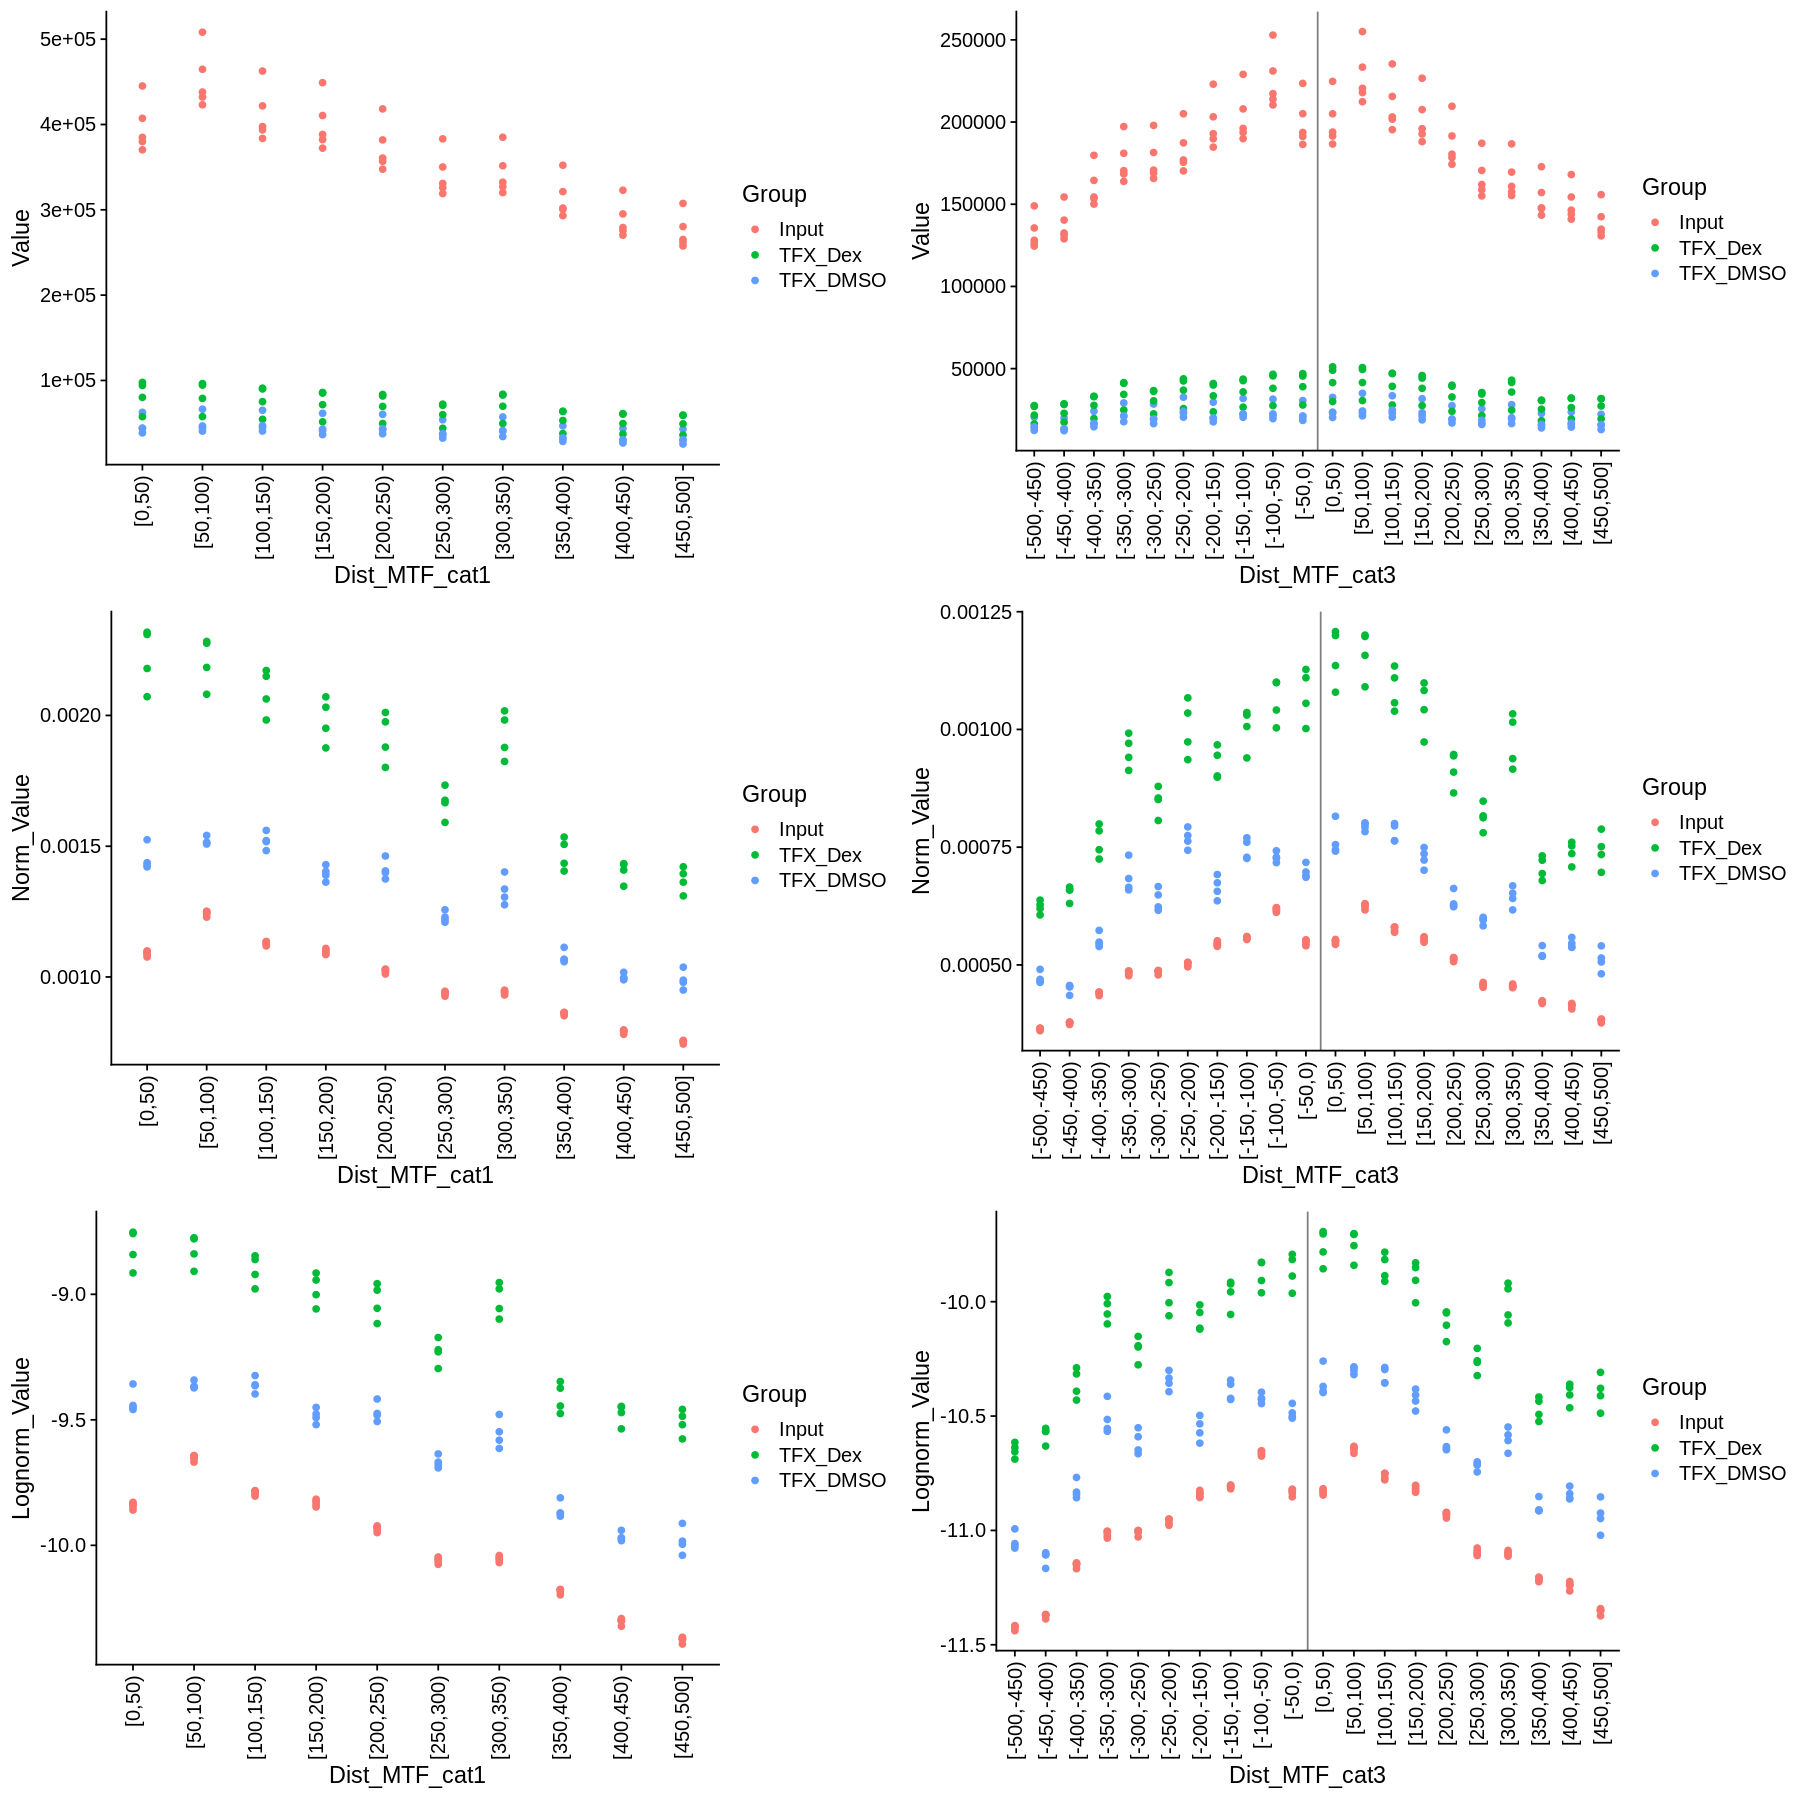

In [79]:
options(repr.plot.width=15, repr.plot.height=15)
plot_grid(plotlist = lst_gpt, ncol=2)

In [88]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 500, Score.x >= 10.81, Score.y >= 10.81) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,500,by=5), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,500,by=5), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-500,500,by=5), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-500,500,by=5), include.lowest=TRUE, right=FALSE))

dat1 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat1) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat3) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [90]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Value,         color=Group))
gp2 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Value,         color=Group))
gp3 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Norm_Value,    color=Group))
gp4 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Norm_Value,    color=Group))
gp5 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Lognorm_Value, color=Group))
gp6 = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Lognorm_Value, color=Group))

lst_gpt = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt +
        geom_point() + 
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
})

#lst_gpt[[2]] = lst_gpt[[2]] + geom_vline(xintercept=10.5, color="grey50")
#lst_gpt[[4]] = lst_gpt[[4]] + geom_vline(xintercept=10.5, color="grey50")
#lst_gpt[[6]] = lst_gpt[[6]] + geom_vline(xintercept=10.5, color="grey50")

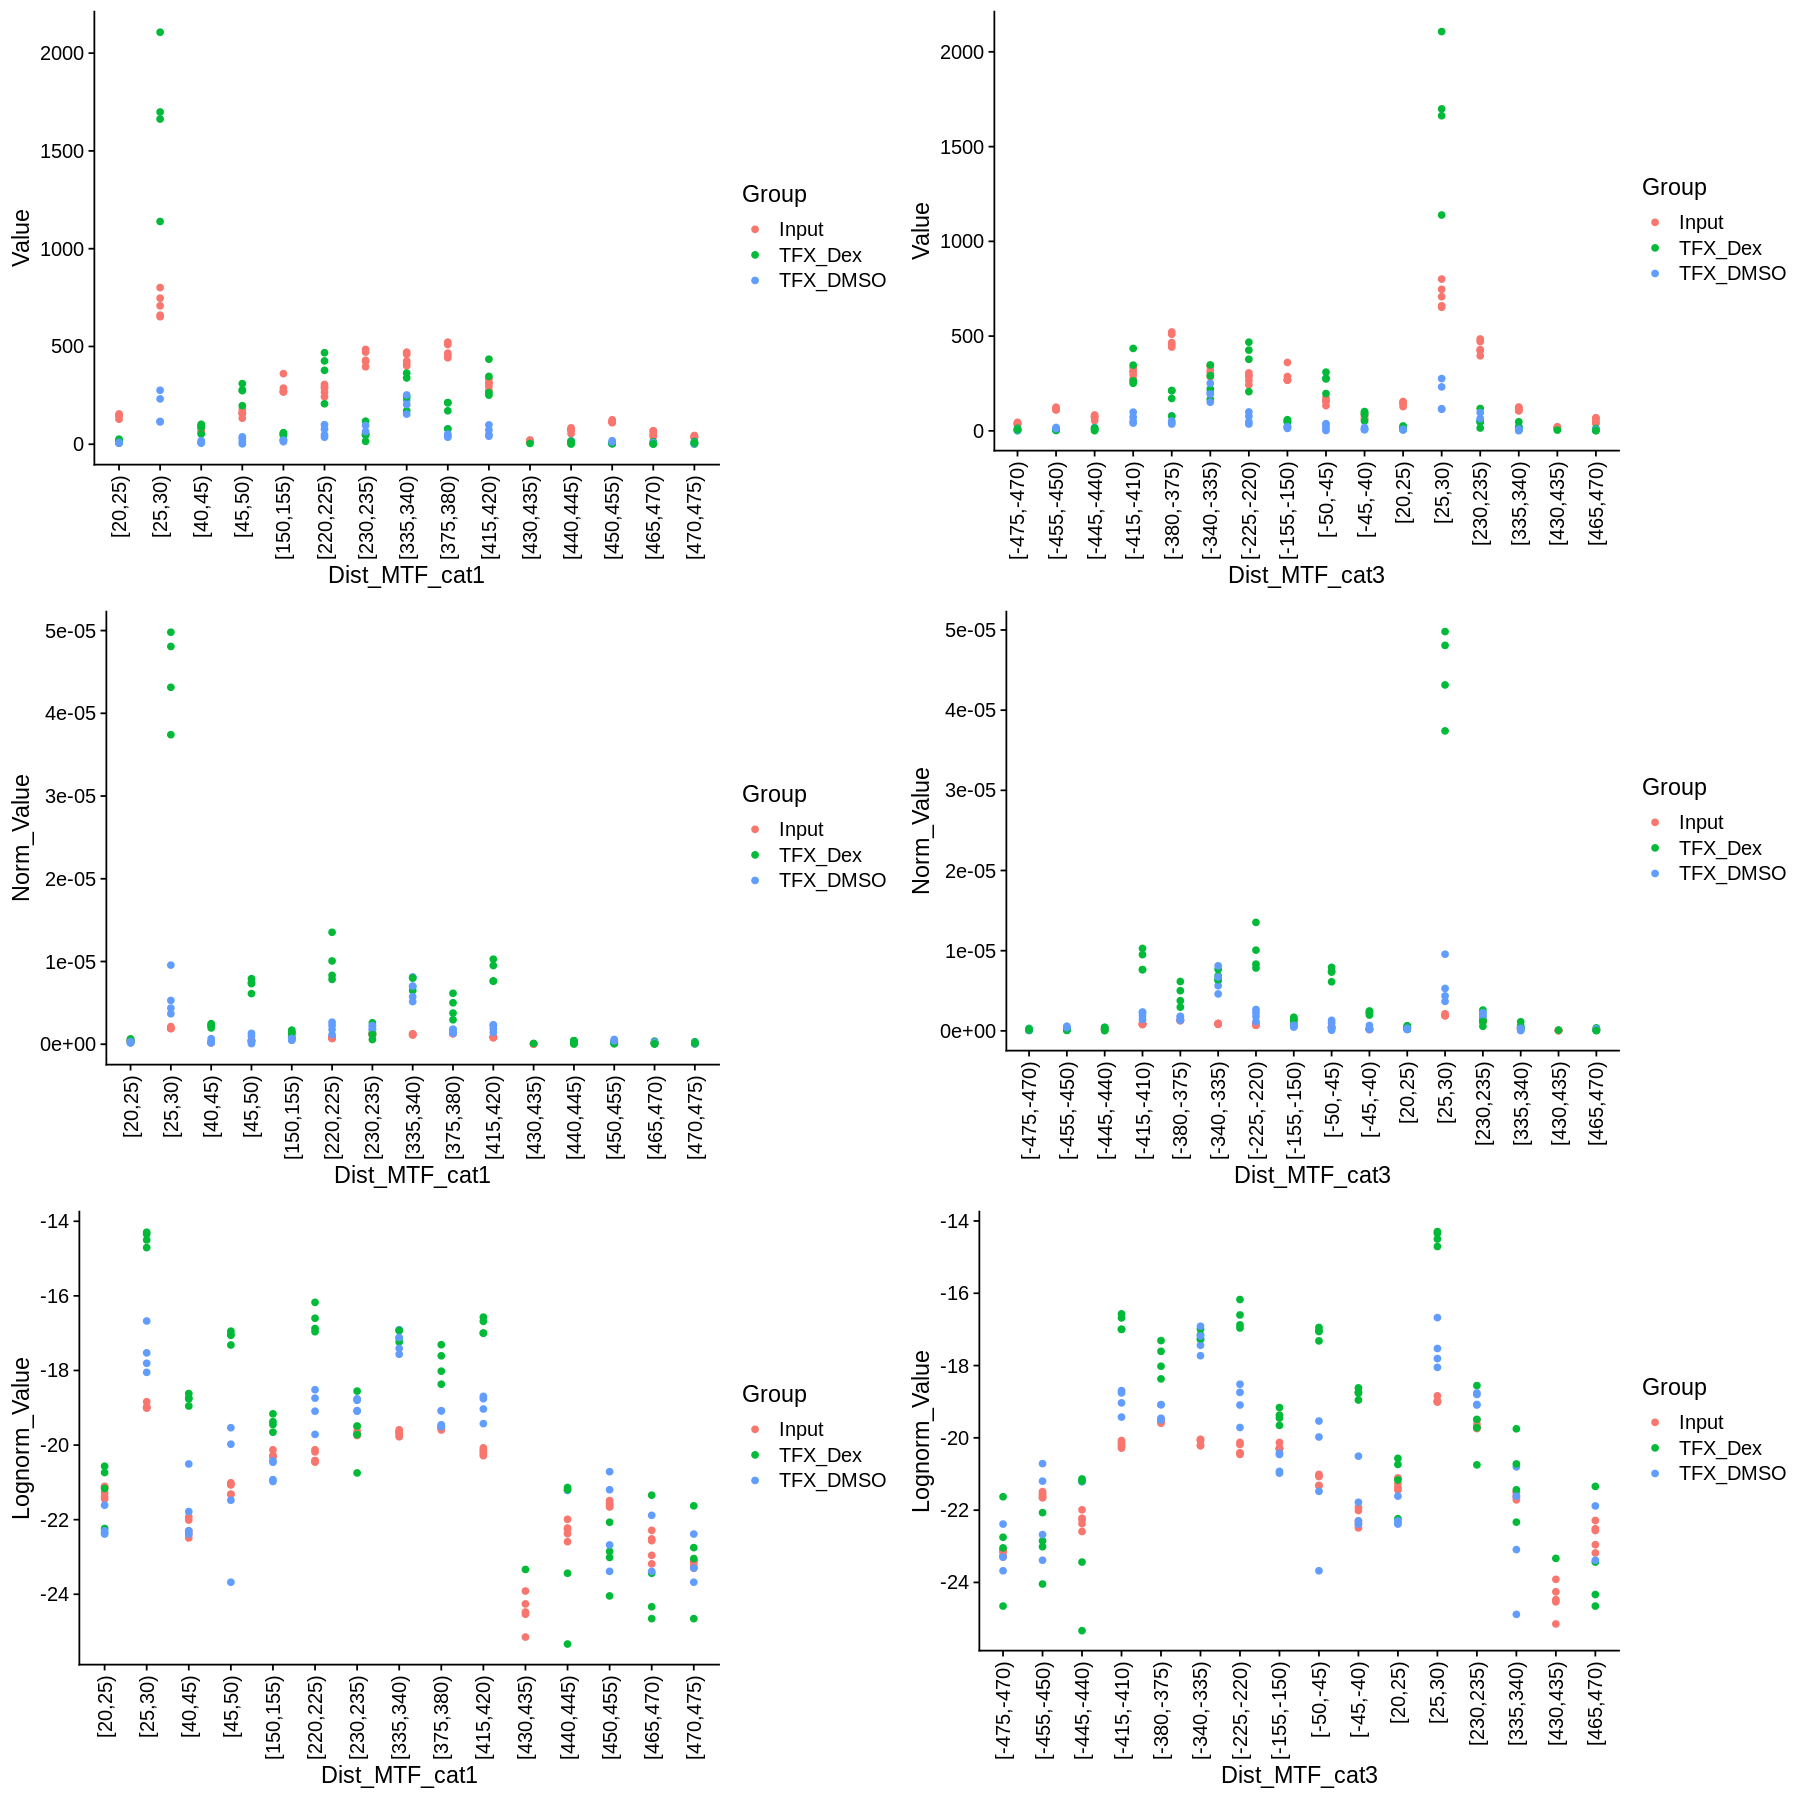

In [91]:
options(repr.plot.width=15, repr.plot.height=15)
plot_grid(plotlist = lst_gpt, ncol=2)

In [27]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat1 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat2) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat4) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [28]:
length(unique(dat2$Dist_MTF_cat4))

[1] 41

In [30]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Value,         color=Group))
gp2 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Value,         color=Group))
gp3 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Norm_Value,    color=Group))
gp4 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Norm_Value,    color=Group))
gp5 = ggplot(dat1, aes(x=Dist_MTF_cat2, y=Lognorm_Value, color=Group))
gp6 = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Lognorm_Value, color=Group))

lst_gpt = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt +
        geom_point() + 
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
})

lst_gpt[[2]] = lst_gpt[[2]] + geom_vline(xintercept=20.5, color="grey50")
lst_gpt[[4]] = lst_gpt[[4]] + geom_vline(xintercept=20.5, color="grey50")
lst_gpt[[6]] = lst_gpt[[6]] + geom_vline(xintercept=20.5, color="grey50")

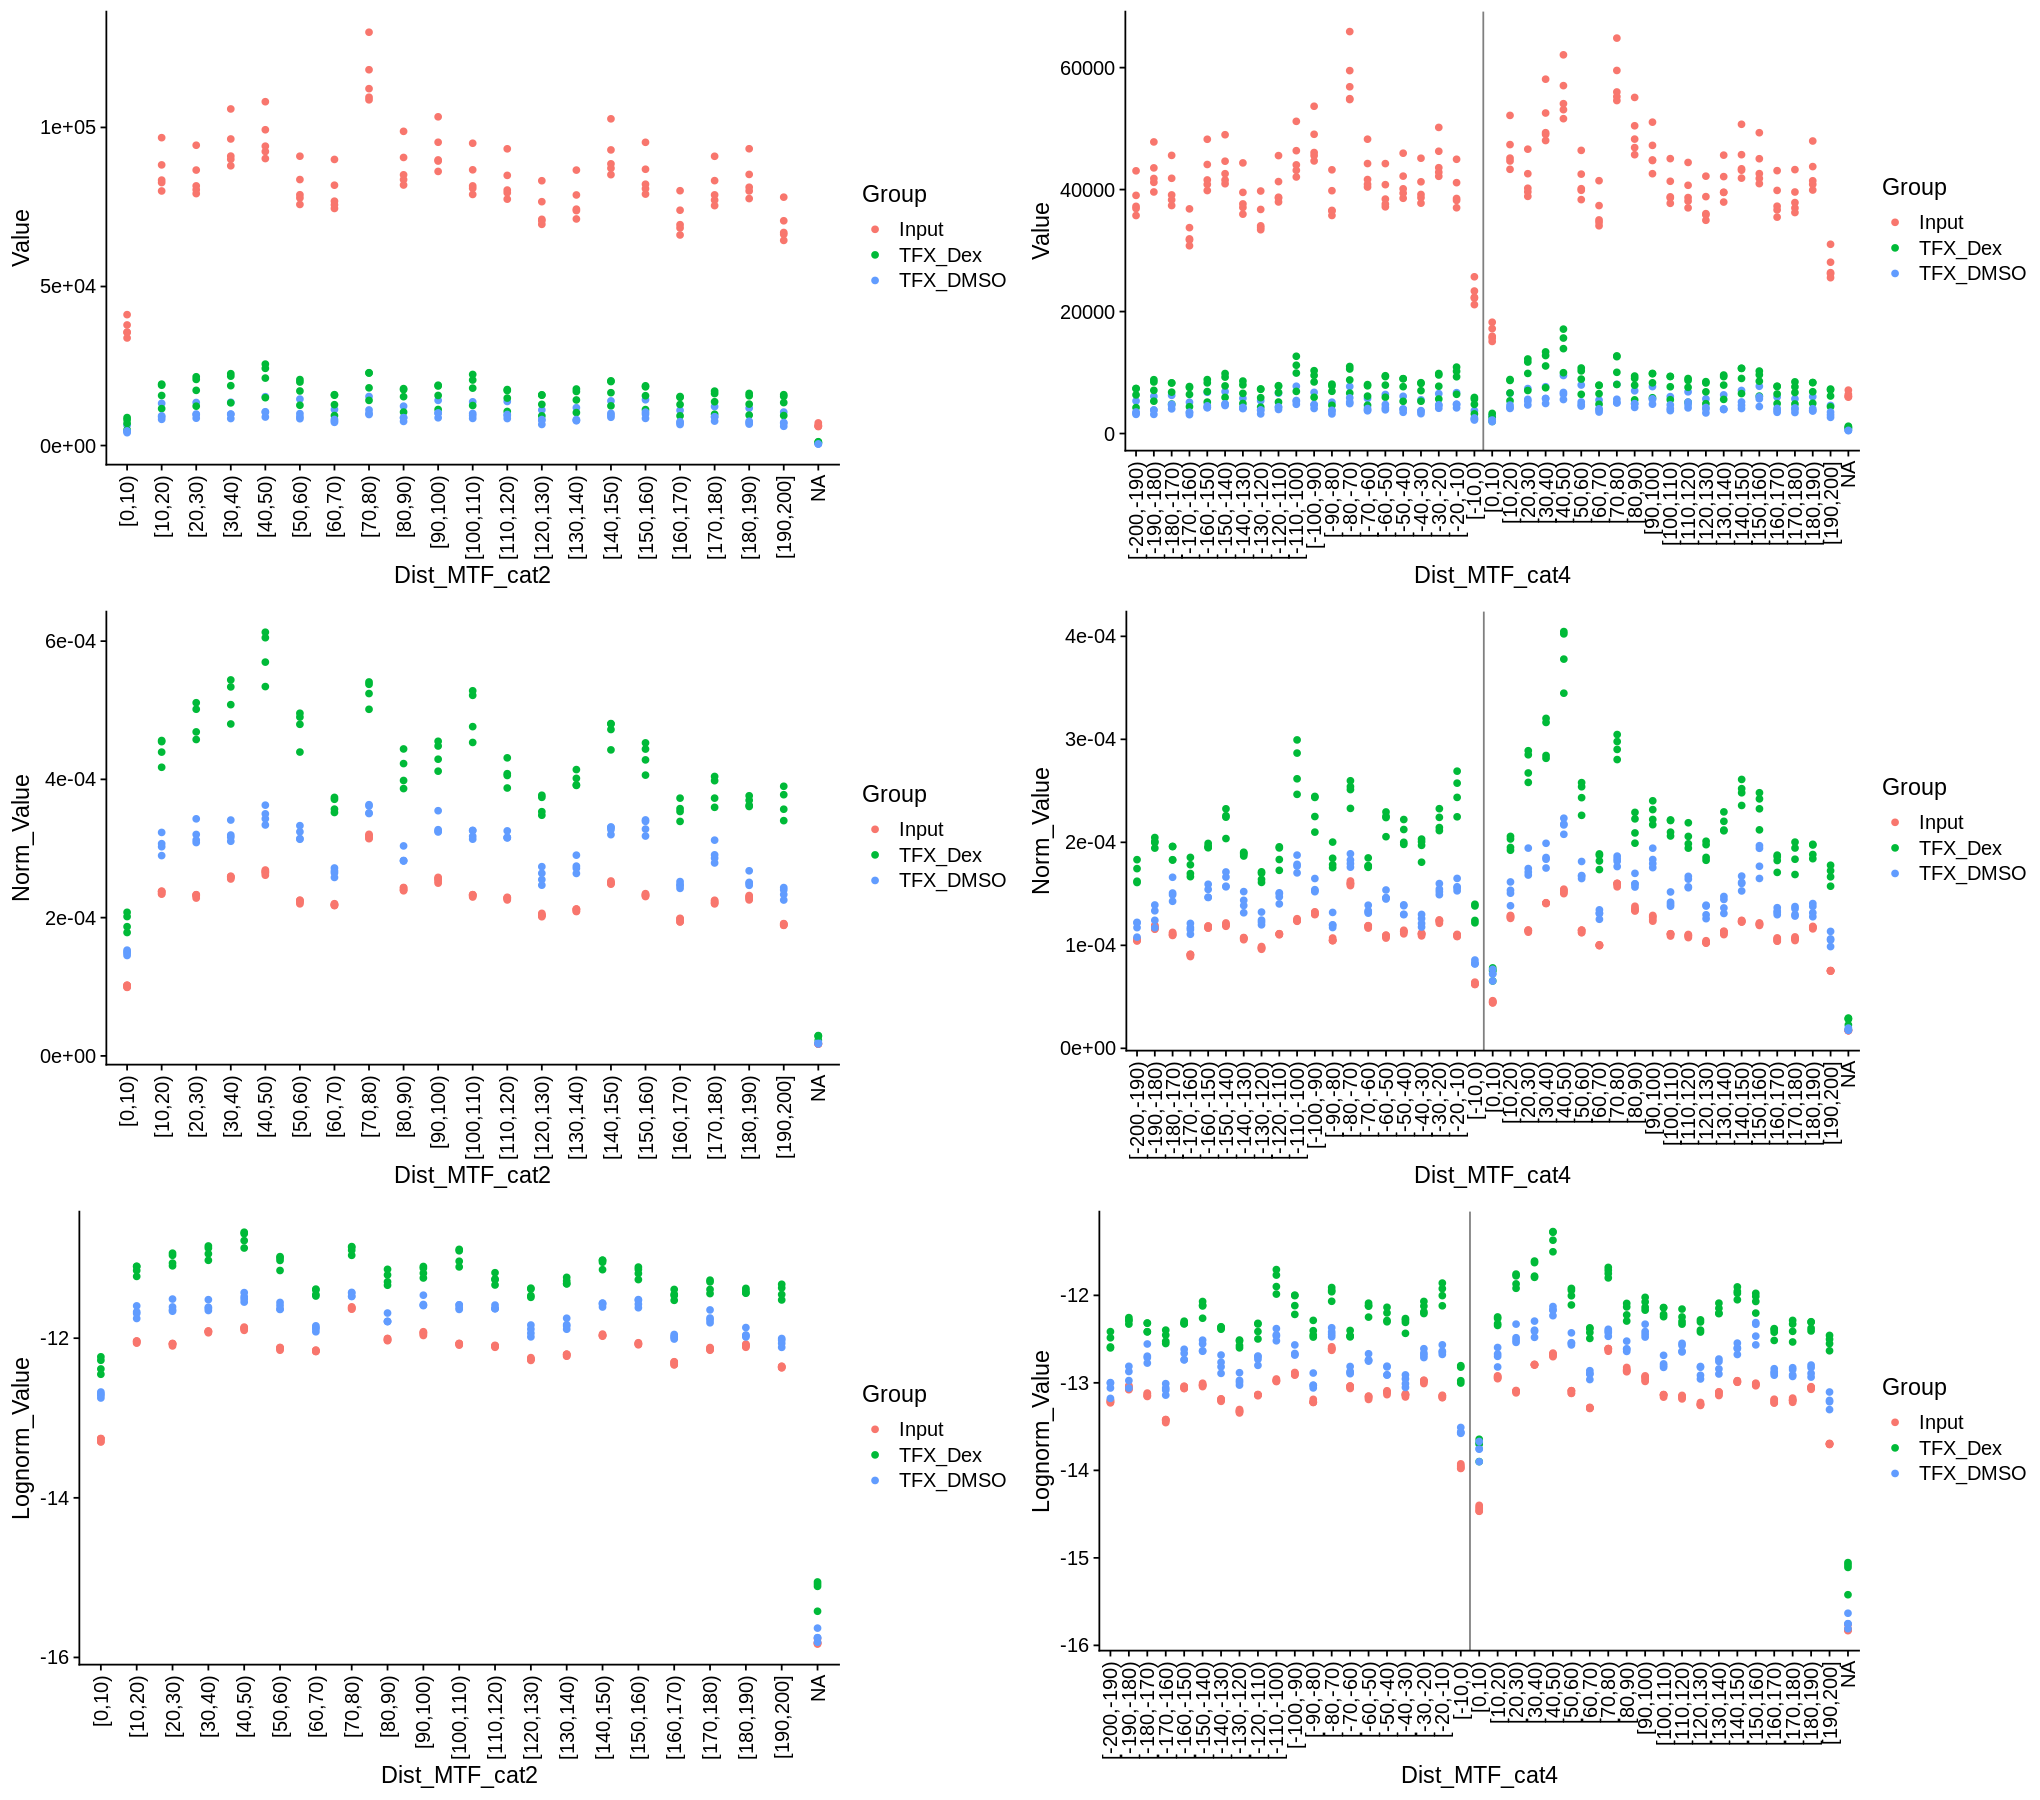

In [31]:
options(repr.plot.width=17, repr.plot.height=15)
plot_grid(plotlist = lst_gpt, ncol=2)

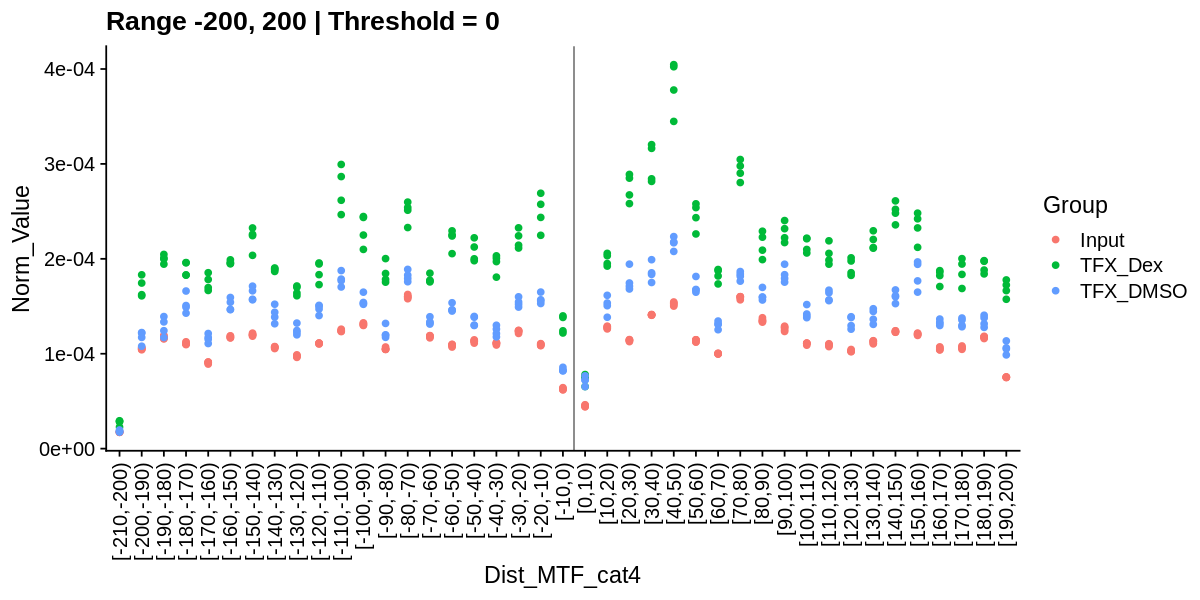

In [85]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-210,210,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-210,210,by=10), include.lowest=TRUE, right=FALSE))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat4) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

gpt = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Norm_Value, color=Group))+
        geom_point() + 
        geom_vline(xintercept=21.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

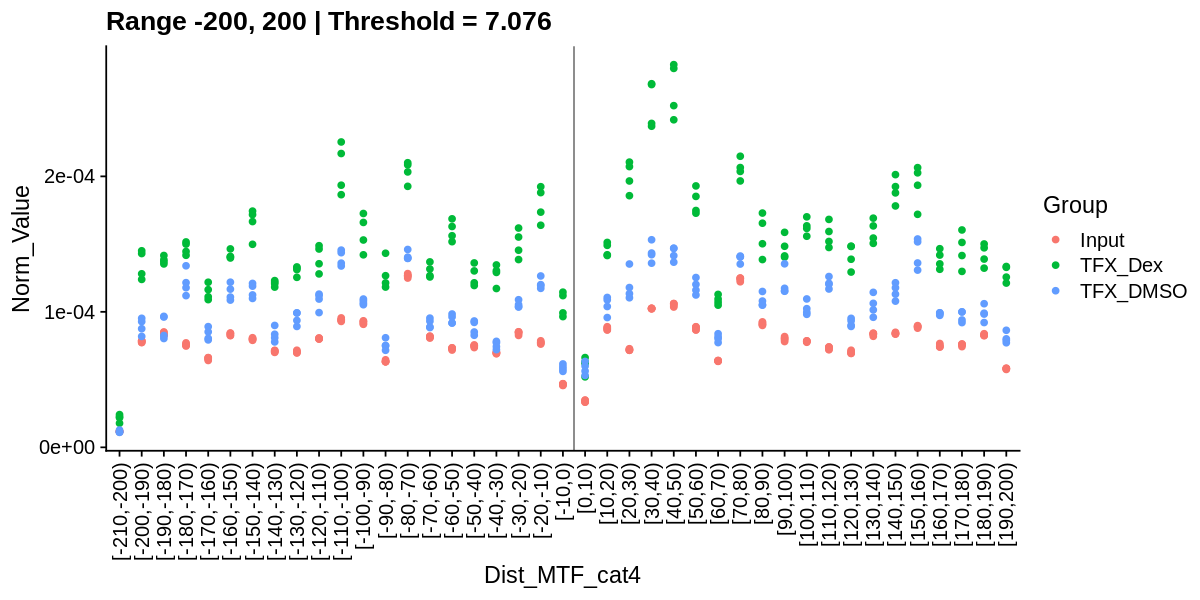

In [86]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200, Score.x >= 7.076, Score.y >= 7.076) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-210,210,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-210,210,by=10), include.lowest=TRUE, right=FALSE))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat4) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

gpt = ggplot(dat2, aes(x=Dist_MTF_cat4, y=Norm_Value, color=Group))+
        geom_point() + 
        geom_vline(xintercept=21.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 7.076")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

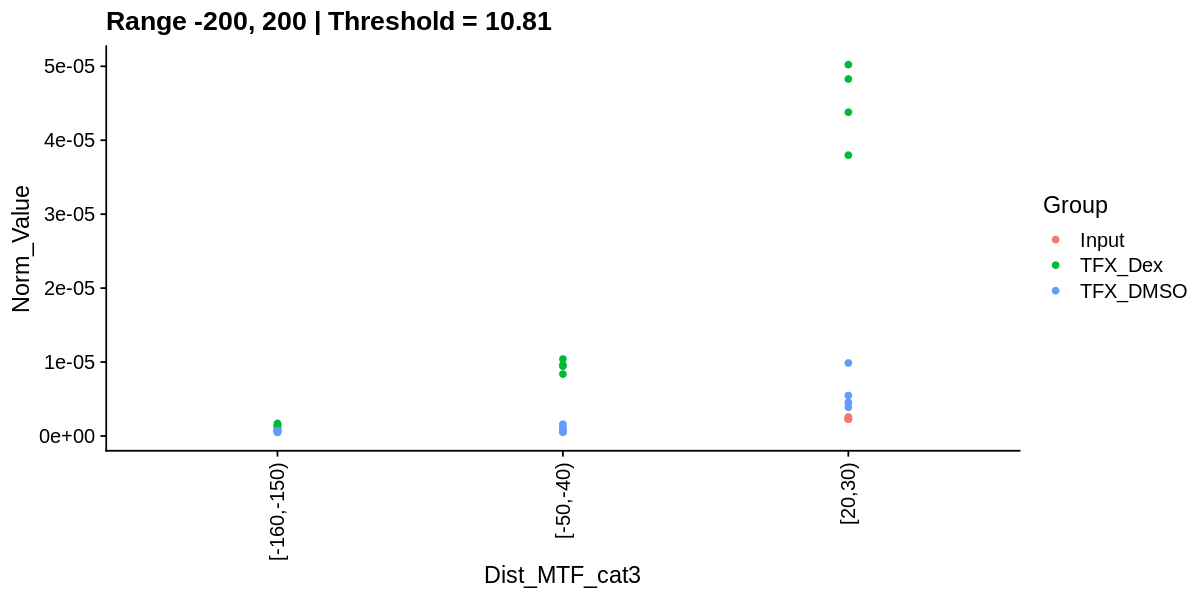

In [128]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200, Score.x >= 10.81, Score.y >= 10.81) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat2 = dat %>%
    group_by(Sample, Group, Dist_MTF_cat3) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

gpt = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Norm_Value, color=Group))+
        geom_point() + 
        geom_vline(xintercept=20.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 10.81")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

## Ratio

In [101]:
get_group2 = function(vec){
    res = sapply(vec, function(x){
        if (str_detect(x, "Input")){
            return("Input")
        } else {
            return(x)
        }
    })
    return(res)
}

In [102]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat = dat %>%
    na.omit() %>%
    group_by(Sample, Group, Dist_MTF_cat4) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat$Group2 = get_group2(dat$Sample)
dat = dat %>%
    group_by(Group2, Dist_MTF_cat4) %>% 
    summarise(Norm_Value = mean(Norm_Value), .groups = 'drop')
head(dat)

Group2 Dist_MTF_cat4 Norm_Value  
1 Input  [-200,-190)   1.053233e-04
2 Input  [-190,-180)   1.173792e-04
3 Input  [-180,-170)   1.108940e-04
4 Input  [-170,-160)   9.053151e-05
5 Input  [-160,-150)   1.176923e-04
6 Input  [-150,-140)   1.199965e-04

In [103]:
tmp = dat %>% mutate(Group = str_remove(Group2, "[0-9]"))
tail(tmp)

Group2    Dist_MTF_cat4 Norm_Value   Group   
1 TFX5_DMSO [140,150)     0.0001600532 TFX_DMSO
2 TFX5_DMSO [150,160)     0.0001967487 TFX_DMSO
3 TFX5_DMSO [160,170)     0.0001318473 TFX_DMSO
4 TFX5_DMSO [170,180)     0.0001376340 TFX_DMSO
5 TFX5_DMSO [180,190)     0.0001277584 TFX_DMSO
6 TFX5_DMSO [190,200]     0.0001062401 TFX_DMSO

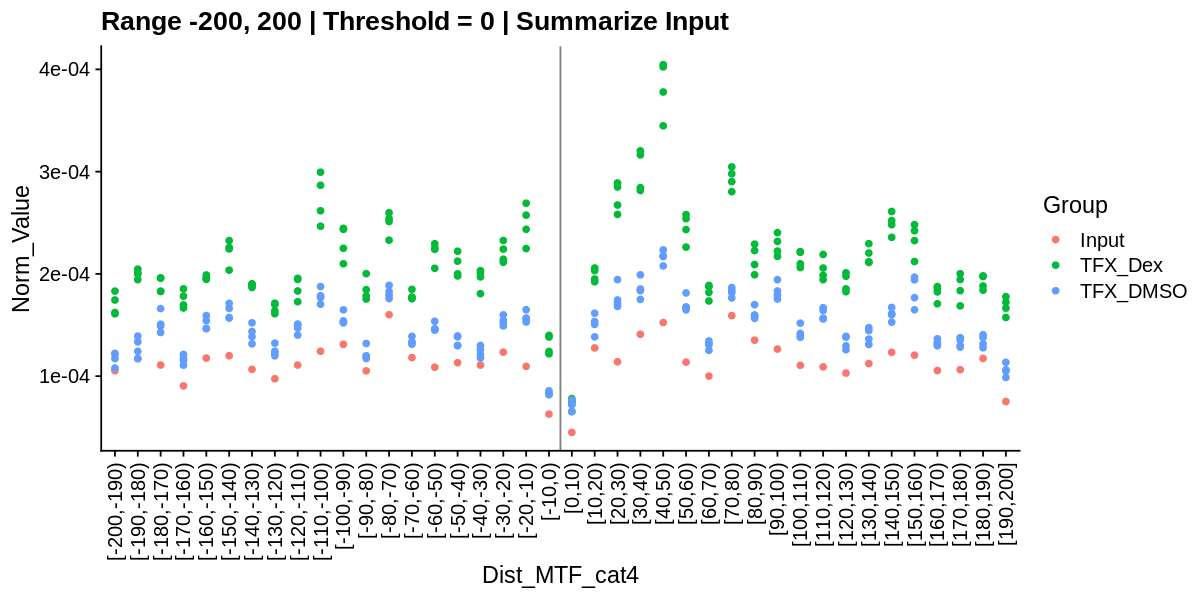

In [104]:
gpt = ggplot(tmp, aes(x=Dist_MTF_cat4, y=Norm_Value, color=Group))+
        geom_point() + 
        geom_vline(xintercept=20.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0 | Summarize Input")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

In [105]:
dat = dat %>% spread(Group2, Norm_Value)
head(dat)

Dist_MTF_cat4 Input        TFX2_Dex     TFX2_DMSO    TFX3_Dex    
1 [-200,-190)   1.053233e-04 0.0001622424 0.0001217938 0.0001609808
2 [-190,-180)   1.173792e-04 0.0001943914 0.0001391733 0.0002008661
3 [-180,-170)   1.108940e-04 0.0001827649 0.0001427542 0.0001831014
4 [-170,-160)   9.053151e-05 0.0001696851 0.0001171866 0.0001666624
5 [-160,-150)   1.176923e-04 0.0001947217 0.0001542721 0.0001952223
6 [-150,-140)   1.199965e-04 0.0002036617 0.0001568038 0.0002244261
  TFX3_DMSO    TFX4_Dex     TFX4_DMSO    TFX5_Dex     TFX5_DMSO   
1 0.0001171905 0.0001831739 0.0001079430 0.0001744731 0.0001223182
2 0.0001170787 0.0002046540 0.0001242911 0.0001997625 0.0001335452
3 0.0001507854 0.0001960677 0.0001490072 0.0001958391 0.0001660825
4 0.0001152517 0.0001853710 0.0001107538 0.0001782310 0.0001213133
5 0.0001592867 0.0001989587 0.0001467133 0.0001963118 0.0001464354
6 0.0001712183 0.0002258451 0.0001574074 0.0002325441 0.0001662904

In [106]:
dat = dat %>% 
    mutate(TFX2_DMSO_vs_Input = TFX2_DMSO / Input,
           TFX3_DMSO_vs_Input = TFX3_DMSO / Input,
           TFX4_DMSO_vs_Input = TFX4_DMSO / Input,
           TFX5_DMSO_vs_Input = TFX5_DMSO / Input,
           TFX2_Dex_vs_Input  = TFX2_Dex / Input,
           TFX3_Dex_vs_Input  = TFX3_Dex / Input,
           TFX4_Dex_vs_Input  = TFX4_Dex / Input,
           TFX5_Dex_vs_Input  = TFX5_Dex / Input)
head(dat)

Dist_MTF_cat4 Input        TFX2_Dex     TFX2_DMSO    TFX3_Dex    
1 [-200,-190)   1.053233e-04 0.0001622424 0.0001217938 0.0001609808
2 [-190,-180)   1.173792e-04 0.0001943914 0.0001391733 0.0002008661
3 [-180,-170)   1.108940e-04 0.0001827649 0.0001427542 0.0001831014
4 [-170,-160)   9.053151e-05 0.0001696851 0.0001171866 0.0001666624
5 [-160,-150)   1.176923e-04 0.0001947217 0.0001542721 0.0001952223
6 [-150,-140)   1.199965e-04 0.0002036617 0.0001568038 0.0002244261
  TFX3_DMSO    TFX4_Dex     TFX4_DMSO    TFX5_Dex     TFX5_DMSO   
1 0.0001171905 0.0001831739 0.0001079430 0.0001744731 0.0001223182
2 0.0001170787 0.0002046540 0.0001242911 0.0001997625 0.0001335452
3 0.0001507854 0.0001960677 0.0001490072 0.0001958391 0.0001660825
4 0.0001152517 0.0001853710 0.0001107538 0.0001782310 0.0001213133
5 0.0001592867 0.0001989587 0.0001467133 0.0001963118 0.0001464354
6 0.0001712183 0.0002258451 0.0001574074 0.0002325441 0.0001662904
  TFX2_DMSO_vs_Input TFX3_DMSO_vs_Input TFX4_DMSO_vs_Input TFX5_DMSO_vs_Input
1 1.156381           1.1126750          1.024873           1.161360          
2 1.185673           0.9974401          1.058885           1.137725          
3 1.287303           1.3597257          1.343690           1.497669          
4 1.294429           1.2730558          1.223373           1.340012          
5 1.310809           1.3534164          1.246583           1.244222          
6 1.306736           1.4268600          1.311766           1.385793          
  TFX2_Dex_vs_Input TFX3_Dex_vs_Input TFX4_Dex_vs_Input TFX5_Dex_vs_Input
1 1.540423          1.528445          1.739159          1.656549         
2 1.656098          1.711258          1.743529          1.701856         
3 1.648104          1.651139          1.768064          1.766002         
4 1.874321          1.840933          2.047586          1.968718         
5 1.654498          1.658752          1.690499          1.668009         
6 1.697230          1.870271          1.882096          1.937924

In [107]:
tmp = dat %>% dplyr::select(Dist_MTF_cat4, ends_with("vs_input")) %>% gather(Sample, Ratio, -Dist_MTF_cat4) 
head(tmp)

Dist_MTF_cat4 Sample             Ratio   
1 [-200,-190)   TFX2_DMSO_vs_Input 1.156381
2 [-190,-180)   TFX2_DMSO_vs_Input 1.185673
3 [-180,-170)   TFX2_DMSO_vs_Input 1.287303
4 [-170,-160)   TFX2_DMSO_vs_Input 1.294429
5 [-160,-150)   TFX2_DMSO_vs_Input 1.310809
6 [-150,-140)   TFX2_DMSO_vs_Input 1.306736

In [108]:
tmp = tmp %>% mutate(Group = str_remove(Sample, "[0-9]"))
tail(tmp)

Dist_MTF_cat4 Sample            Ratio    Group           
1 [140,150)     TFX5_Dex_vs_Input 2.044252 TFX_Dex_vs_Input
2 [150,160)     TFX5_Dex_vs_Input 2.009180 TFX_Dex_vs_Input
3 [160,170)     TFX5_Dex_vs_Input 1.728437 TFX_Dex_vs_Input
4 [170,180)     TFX5_Dex_vs_Input 1.881680 TFX_Dex_vs_Input
5 [180,190)     TFX5_Dex_vs_Input 1.682177 TFX_Dex_vs_Input
6 [190,200]     TFX5_Dex_vs_Input 2.291334 TFX_Dex_vs_Input

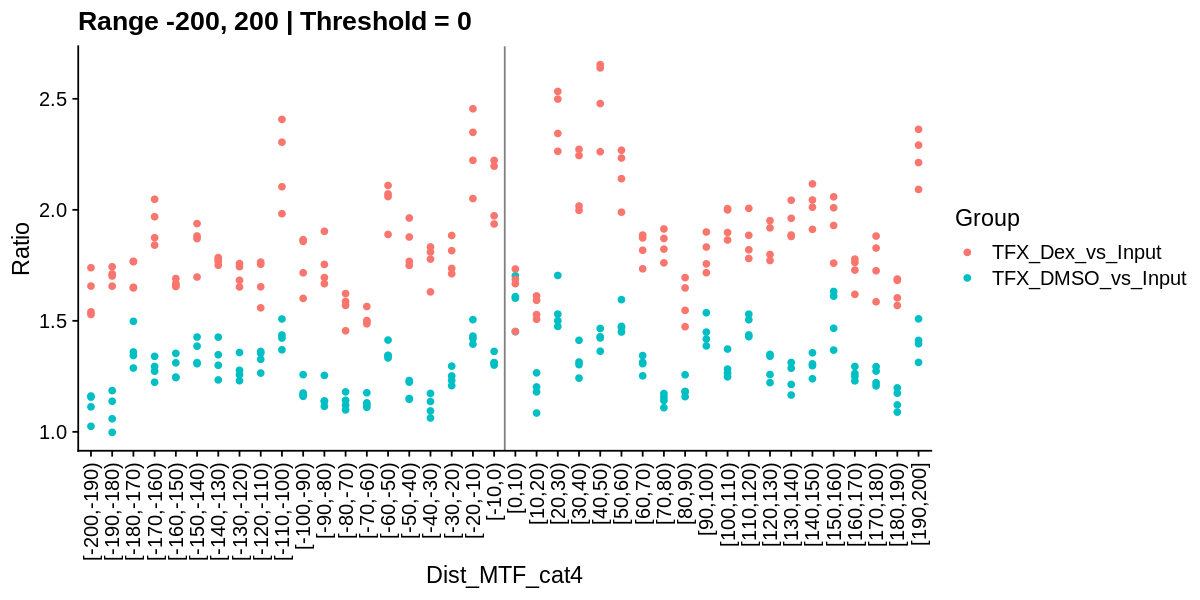

In [109]:
gpt = ggplot(tmp, aes(x=Dist_MTF_cat4, y=Ratio, color=Group))+
        geom_point() + 
        geom_vline(xintercept=20.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

In [110]:
tmp = tmp %>% 
    group_by(Dist_MTF_cat4, Group) %>% 
    summarize(mu = mean(Ratio), std = sd(Ratio), .groups = 'drop')
head(tmp)

Dist_MTF_cat4 Group             mu       std       
1 [-200,-190)   TFX_Dex_vs_Input  1.616144 0.10031625
2 [-200,-190)   TFX_DMSO_vs_Input 1.113822 0.06320430
3 [-190,-180)   TFX_Dex_vs_Input  1.703185 0.03611012
4 [-190,-180)   TFX_DMSO_vs_Input 1.094931 0.08340501
5 [-180,-170)   TFX_Dex_vs_Input  1.708328 0.06780428
6 [-180,-170)   TFX_DMSO_vs_Input 1.372097 0.08929049

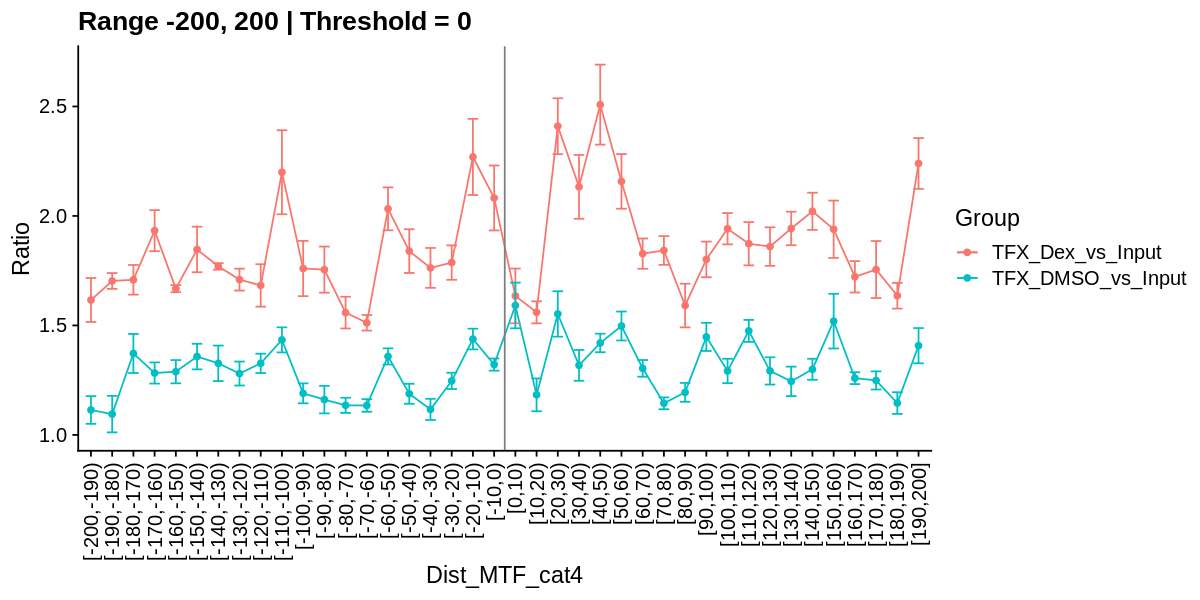

In [111]:
gpt = ggplot(tmp, aes(x=Dist_MTF_cat4, y=mu, color=Group, group = Group))+
        geom_point() + 
        geom_line() +
        geom_vline(xintercept=20.5, color="grey50") +
        geom_errorbar(aes(ymin=mu-std, ymax=mu+std), 
                          width=.5) +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0", y = "Ratio")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

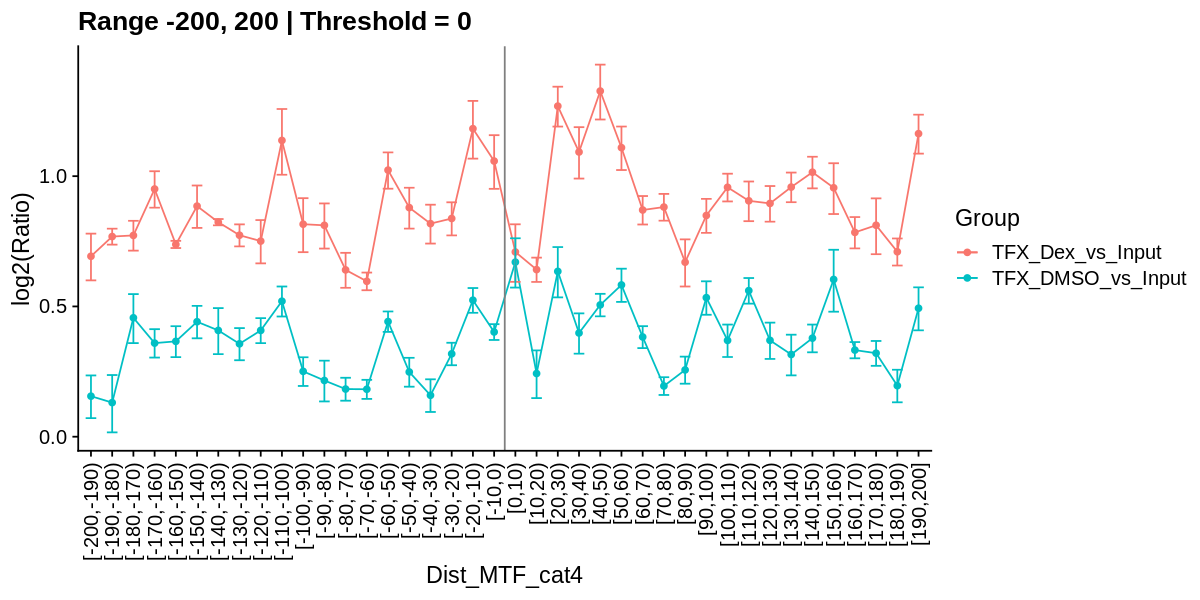

In [112]:
gpt = ggplot(tmp, aes(x=Dist_MTF_cat4, y=log2(mu), color=Group, group = Group))+
        geom_point() + 
        geom_line() +
        geom_vline(xintercept=20.5, color="grey50") +
        geom_errorbar(aes(ymin=log2(mu-std), ymax=log2(mu+std)), 
                          width=.5) +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0", y = "log2(Ratio)")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

In [113]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat = dat %>%
    na.omit %>%
    group_by(Sample, Group, Dist_MTF_cat2) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

dat$Group2 = get_group2(dat$Sample)
dat = dat %>%
    group_by(Group2, Dist_MTF_cat2) %>% 
    summarise(Norm_Value = mean(Norm_Value), .groups = 'drop')

###
dat = dat %>% spread(Group2, Norm_Value)
dat = dat %>% 
    mutate(TFX2_DMSO_vs_Input = TFX2_DMSO / Input,
           TFX3_DMSO_vs_Input = TFX3_DMSO / Input,
           TFX4_DMSO_vs_Input = TFX4_DMSO / Input,
           TFX5_DMSO_vs_Input = TFX5_DMSO / Input,
           TFX2_Dex_vs_Input  = TFX2_Dex / Input,
           TFX3_Dex_vs_Input  = TFX3_Dex / Input,
           TFX4_Dex_vs_Input  = TFX4_Dex / Input,
           TFX5_Dex_vs_Input  = TFX5_Dex / Input)


dat = dat %>% dplyr::select(Dist_MTF_cat2, ends_with("vs_input")) %>% 
    gather(Sample, Ratio, -Dist_MTF_cat2)
dat = dat %>% mutate(Group = str_remove(Sample, "[0-9]"))
dat = dat %>% group_by(Dist_MTF_cat2, Group) %>% 
    summarize(mu = mean(Ratio), std = sd(Ratio), .groups = 'drop')

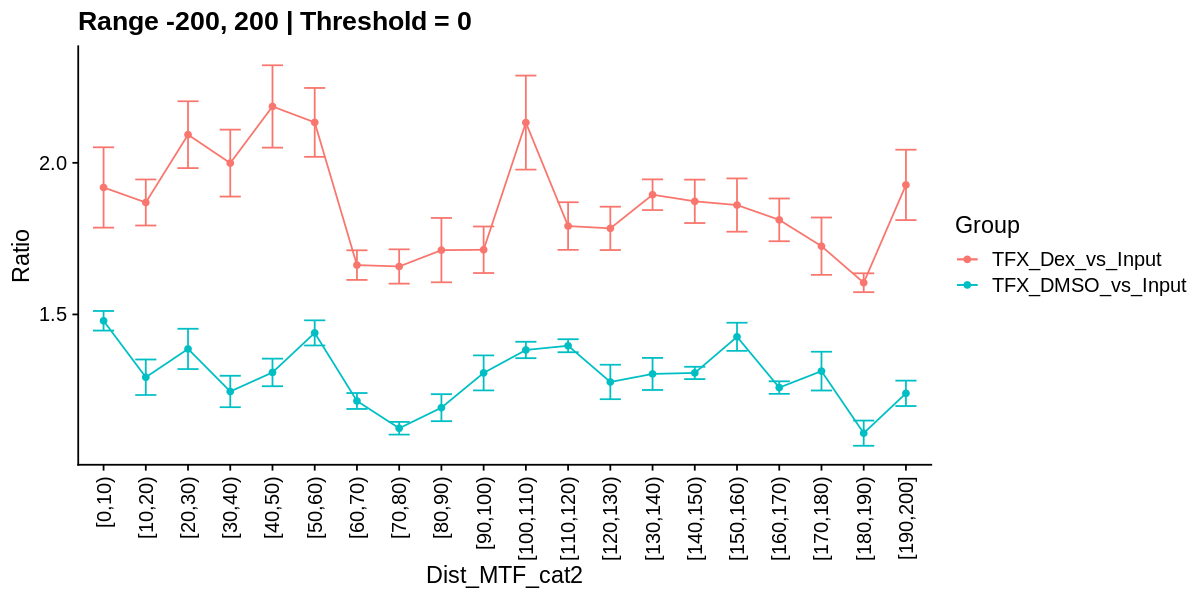

In [114]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat2, y=mu, color=Group, group = Group))+
        geom_point() + 
        geom_line() +
        geom_errorbar(aes(ymin=mu-std, ymax=mu+std), 
                          width=.5) +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0", y = "Ratio")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

In [137]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat$Group2 = get_group2(dat$Sample)

In [138]:
dat %>% dplyr::select(Sample, Group, Group2) %>% distinct

Sample     Group    Group2   
1  Input1_20x Input    Input    
2  Input2_20x Input    Input    
3  Input3_20x Input    Input    
4  Input4_20x Input    Input    
5  Input5_20x Input    Input    
6  TFX2_DMSO  TFX_DMSO TFX2_DMSO
7  TFX3_DMSO  TFX_DMSO TFX3_DMSO
8  TFX4_DMSO  TFX_DMSO TFX4_DMSO
9  TFX5_DMSO  TFX_DMSO TFX5_DMSO
10 TFX2_Dex   TFX_Dex  TFX2_Dex 
11 TFX3_Dex   TFX_Dex  TFX3_Dex 
12 TFX4_Dex   TFX_Dex  TFX4_Dex 
13 TFX5_Dex   TFX_Dex  TFX5_Dex

In [152]:
tmp = dat %>%
    group_by(Group2, Dist_MTF_cat3) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

head(tmp)

ERROR: Error: Join columns must be present in data.
[31m✖[39m Problem with `Sample`.


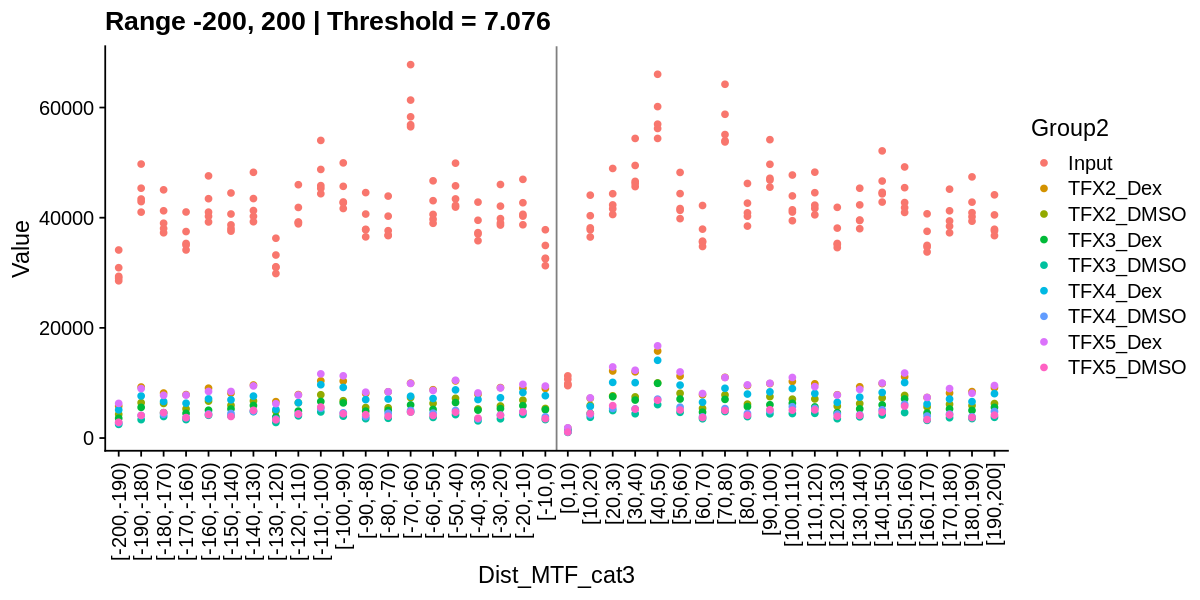

In [149]:
gpt = ggplot(tmp, aes(x=Dist_MTF_cat3, y=Value, color=Group2))+
        geom_point() + 
        geom_vline(xintercept=20.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 7.076")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

In [133]:
dat = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 200) %>%
    mutate(Dist_MTF_cat1 = cut(Dist_MTF_val1, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat2 = cut(Dist_MTF_val2, breaks = seq(   0,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat3 = cut(Dist_MTF_val3, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE),
           Dist_MTF_cat4 = cut(Dist_MTF_val4, breaks = seq(-200,200,by=10), include.lowest=TRUE, right=FALSE))

dat$Group = get_group2(dat$Group)



Sample     Group Dist_MTF_cat3 Value Size      Norm_Value   Lognorm_Value
1 Input1_20x Input [-200,-190)   30923 371718546 8.318928e-05 -13.55324    
2 Input1_20x Input [-190,-180)   45356 371718546 1.220170e-04 -13.00063    
3 Input1_20x Input [-180,-170)   41256 371718546 1.109872e-04 -13.13732    
4 Input1_20x Input [-170,-160)   37485 371718546 1.008424e-04 -13.27561    
5 Input1_20x Input [-160,-150)   43450 371718546 1.168895e-04 -13.06257    
6 Input1_20x Input [-150,-140)   40670 371718546 1.094107e-04 -13.15796

In [134]:
dat %>% dplyr::select(Sample, Group) %>% distinct

Sample     Group   
1  Input1_20x Input   
2  Input2_20x Input   
3  Input3_20x Input   
4  Input4_20x Input   
5  Input5_20x Input   
6  TFX2_Dex   TFX_Dex 
7  TFX2_DMSO  TFX_DMSO
8  TFX3_Dex   TFX_Dex 
9  TFX3_DMSO  TFX_DMSO
10 TFX4_Dex   TFX_Dex 
11 TFX4_DMSO  TFX_DMSO
12 TFX5_Dex   TFX_Dex 
13 TFX5_DMSO  TFX_DMSO

In [ ]:
gpt = ggplot(dat2, aes(x=Dist_MTF_cat3, y=Norm_Value, color=Group))+
        geom_point() + 
        geom_vline(xintercept=20.5, color="grey50") +
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) + 
        labs(title = "Range -200, 200 | Threshold = 0")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

## Ratio

In [188]:
dat1 = dat_test %>%
    dplyr::filter(
        Score.x >= 10.81,
        Score.y >= 10.81,
        Dist_MTF_val1 < 1000) %>%
    mutate(Dist_MTF_cat = cut(
        Dist_MTF_val1, breaks = seq(0,1000,by=100), 
        include.lowest=TRUE, 
        right=FALSE)) %>%
    group_by(Sample, Group, Dist_MTF_cat) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [189]:
dat1 = dat1 %>% 
    group_by(Group, Dist_MTF_cat) %>% 
    summarize(Norm_Value = mean(Norm_Value), .groups = 'drop') %>%
    mutate(Lognorm_Value = log2(Norm_Value))
head(dat1)

Group Dist_MTF_cat Norm_Value   Lognorm_Value
1 Input [0,100)      2.993094e-06 -18.34993    
2 Input [100,200)    7.946390e-07 -20.26320    
3 Input [200,300)    1.977569e-06 -18.94784    
4 Input [300,400)    2.506862e-06 -18.60569    
5 Input [400,500)    1.655650e-06 -19.20417    
6 Input [500,600)    7.206591e-07 -20.40418

In [192]:
dat = dat1 %>% 
    dplyr::select(Group, Dist_MTF_cat, Norm_Value) %>%
    spread(Group, Norm_Value) %>% 
    mutate(DMSO_vs_Input = TFX_DMSO / Input,
           Dex_vs_Input  = TFX_Dex  / Input,
           Dex_vs_DMSO   = TFX_Dex  / TFX_DMSO)
head(dat)

Dist_MTF_cat Input        TFX_Dex      TFX_DMSO     DMSO_vs_Input
1 [0,100)      2.993094e-06 5.452529e-05 6.950684e-06 2.322240     
2 [100,200)    7.946390e-07 1.446117e-06 5.975756e-07 0.752009     
3 [200,300)    1.977569e-06 1.136150e-05 3.985662e-06 2.015435     
4 [300,400)    2.506862e-06 1.184005e-05 8.101954e-06 3.231911     
5 [400,500)    1.655650e-06 9.451568e-06 2.563362e-06 1.548252     
6 [500,600)    7.206591e-07 2.931723e-05 4.363299e-06 6.054594     
  Dex_vs_Input Dex_vs_DMSO
1 18.217032    7.844593   
2  1.819841    2.419973   
3  5.745183    2.850592   
4  4.723057    1.461382   
5  5.708677    3.687176   
6 40.681128    6.719051

In [194]:
dat = dat %>% 
    dplyr::select(Dist_MTF_cat, DMSO_vs_Input,Dex_vs_Input,Dex_vs_DMSO) %>%
    gather(Group, Ratio, -Dist_MTF_cat)
head(dat)

Dist_MTF_cat Group         Ratio   
1 [0,100)      DMSO_vs_Input 2.322240
2 [100,200)    DMSO_vs_Input 0.752009
3 [200,300)    DMSO_vs_Input 2.015435
4 [300,400)    DMSO_vs_Input 3.231911
5 [400,500)    DMSO_vs_Input 1.548252
6 [500,600)    DMSO_vs_Input 6.054594

Warning message:
“Removed 3 rows containing missing values (geom_point).”


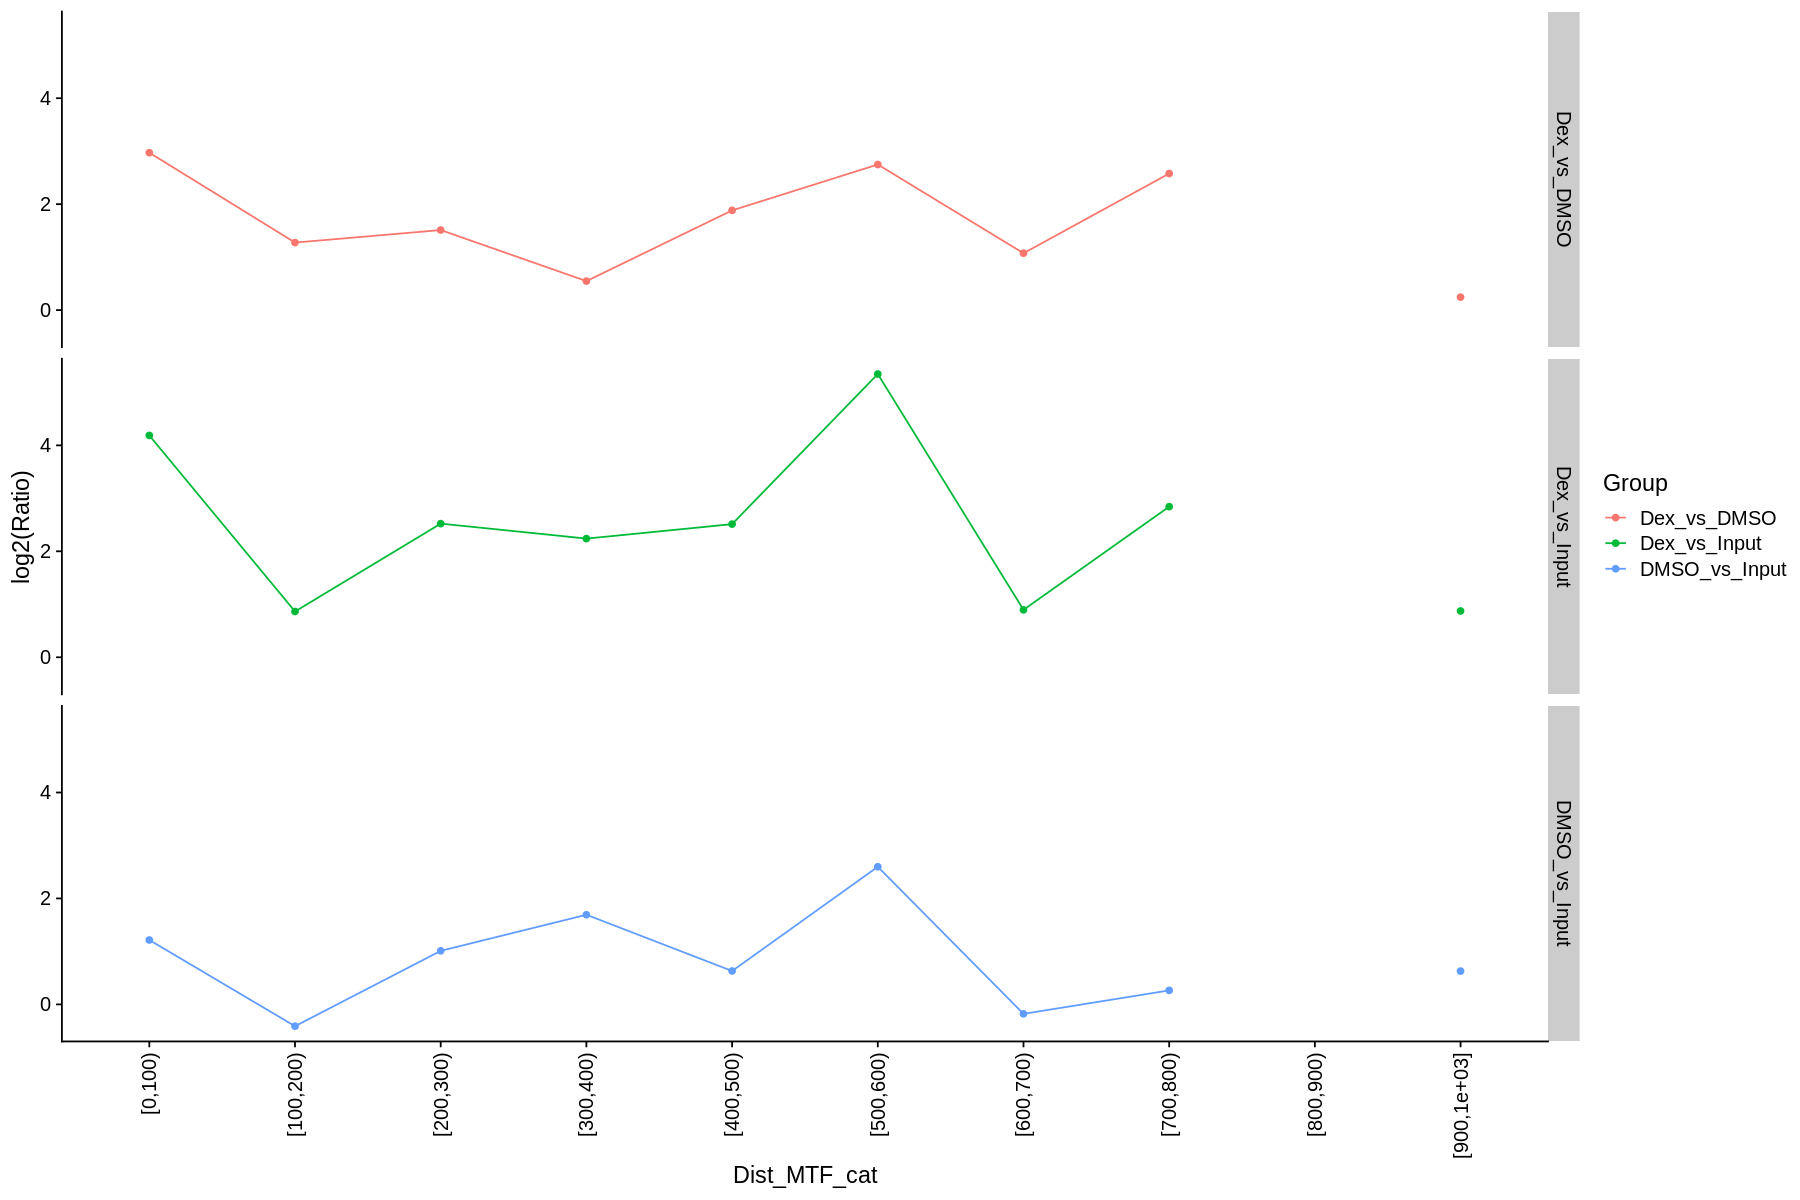

In [198]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat, y=log2(Ratio), color=Group, group=Group)) + 
    geom_point() + 
    geom_line() +
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) +
    facet_grid(Group~.)

options(repr.plot.width=15, repr.plot.height=10)
print(gpt)

In [214]:
dat1 = dat_test %>%
    dplyr::filter(
        Score.x >= 7.79,
        Score.y >= 7.79,
        Dist_MTF_val1 < 250) %>%
    mutate(Dist_MTF_cat = cut(
        Dist_MTF_val1, breaks = seq(0,250,by=10), 
        include.lowest=TRUE, 
        right=FALSE)) %>%
    group_by(Sample, Group, Dist_MTF_cat) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [215]:
dat = dat1 %>% 
    group_by(Group, Dist_MTF_cat) %>% 
    summarize(Norm_Value = mean(Norm_Value), .groups = 'drop') %>%
    mutate(Lognorm_Value = log2(Norm_Value))

dat = dat %>% 
    dplyr::select(Group, Dist_MTF_cat, Norm_Value) %>%
    spread(Group, Norm_Value) %>% 
    mutate(DMSO_vs_Input = TFX_DMSO / Input,
           Dex_vs_Input  = TFX_Dex  / Input,
           Dex_vs_DMSO   = TFX_Dex  / TFX_DMSO)

dat = dat %>% 
    dplyr::select(Dist_MTF_cat, DMSO_vs_Input,Dex_vs_Input,Dex_vs_DMSO) %>%
    gather(Group, Ratio, -Dist_MTF_cat)

head(dat)

Dist_MTF_cat Group         Ratio   
1 [0,10)       DMSO_vs_Input 1.266537
2 [10,20)      DMSO_vs_Input 1.538732
3 [20,30)      DMSO_vs_Input 1.287731
4 [30,40)      DMSO_vs_Input 1.470784
5 [40,50)      DMSO_vs_Input 1.243760
6 [50,60)      DMSO_vs_Input 1.348780

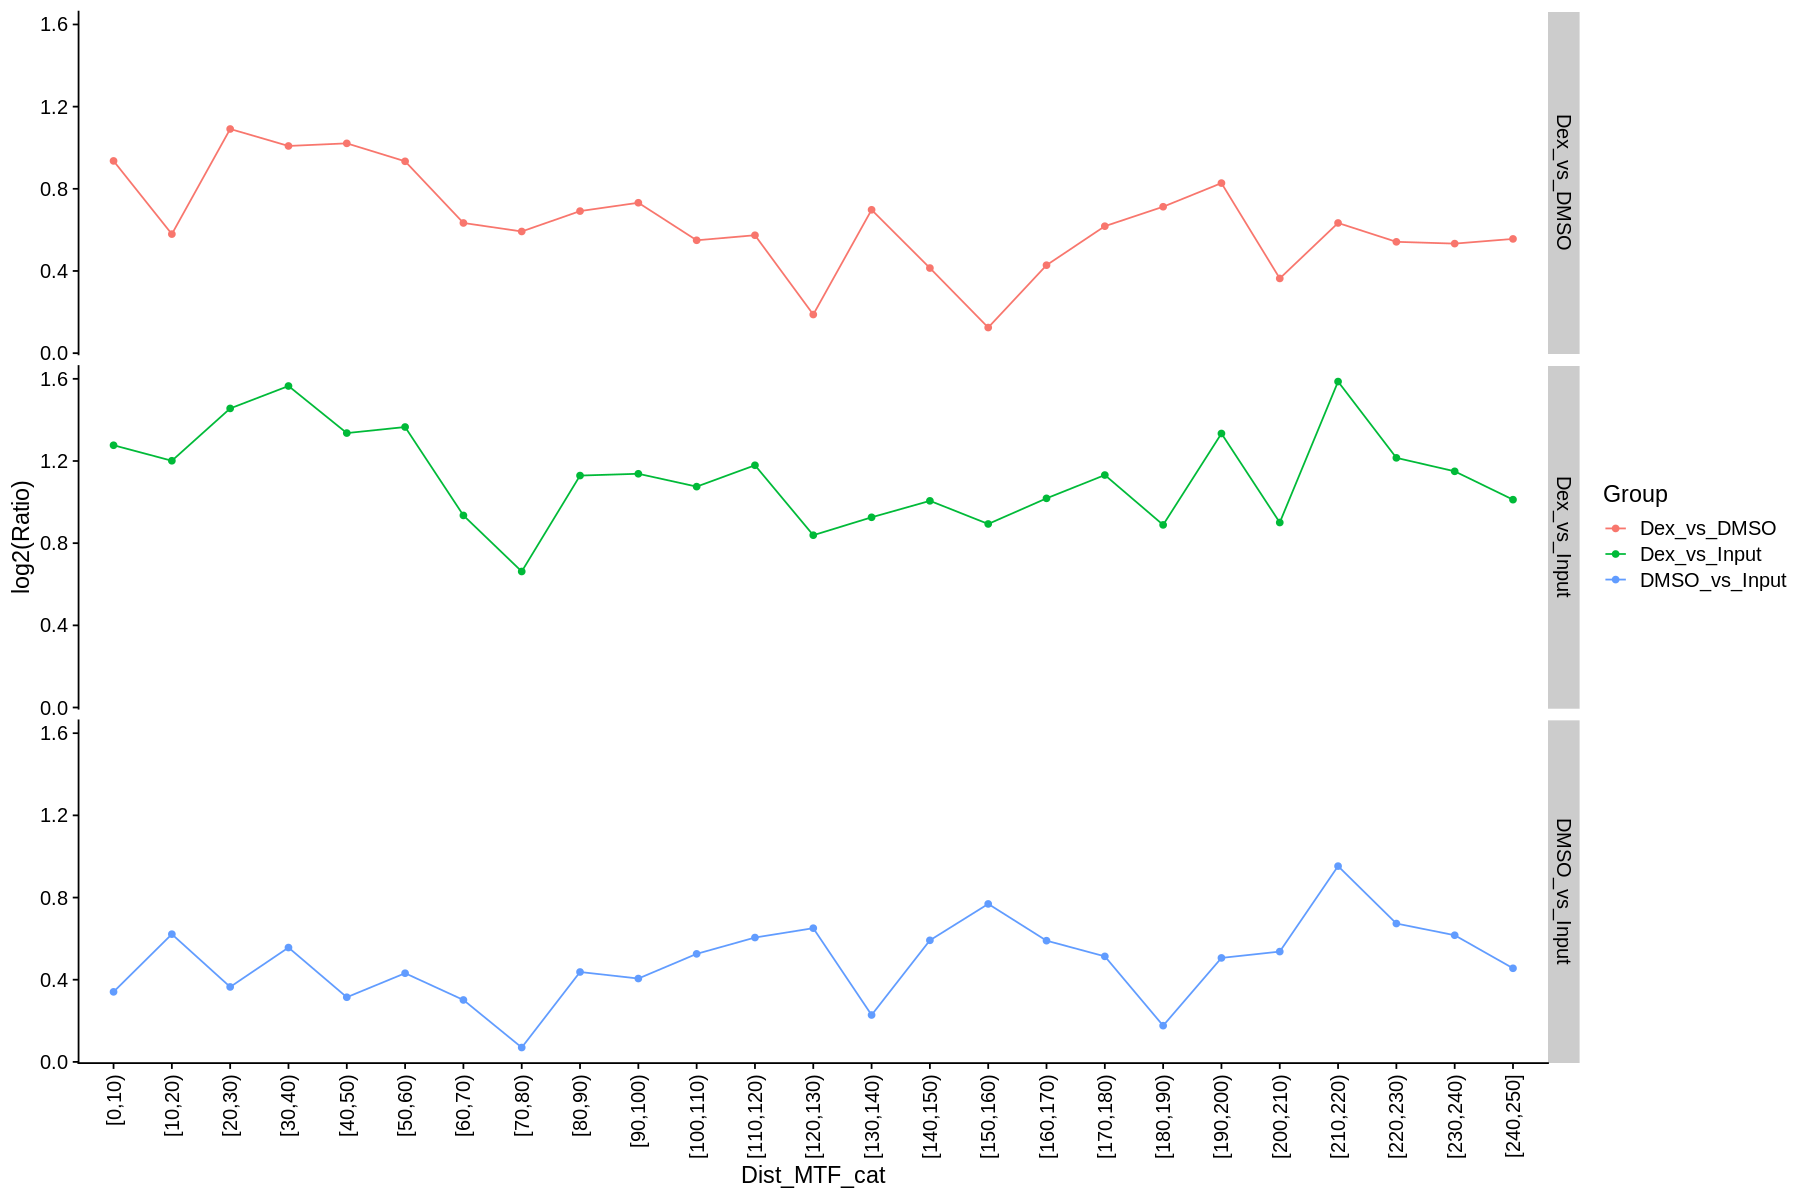

In [216]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat, y=log2(Ratio), color=Group, group=Group)) + 
    geom_point() + 
    geom_line() +
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90)) +
    facet_grid(Group~.)

options(repr.plot.width=15, repr.plot.height=10)
print(gpt)

In [156]:
dat1 = dat_test %>%
    dplyr::filter(Dist_MTF_val1 < 300) %>%
    mutate(Dist_MTF_cat = cut(
        Dist_MTF_val1, breaks = seq(0,1000,by=10), 
        include.lowest=TRUE, 
        right=FALSE)) %>%
    group_by(Sample, Group, Dist_MTF_cat) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>% 
    left_join(dat_lib, by=c("Sample", "Group")) %>%
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log2(Value) - log2(Size))

In [154]:
get_group2 = function(vec){
    res = sapply(vec, function(x){
        if (str_detect(x, "Input")){
            return("Input")
        } else {
            return(x)
        }
    })
    return(res)
}

In [159]:
dat1$Group2 = get_group2(dat1$Sample)

In [187]:
head(dat1)

Chrom_Frag Start_Frag End_Frag Count_Frag Sample     Motif.x Start_MTF.x
1 chr17      174938     176057   1          Input1_20x AP1/1   175919     
2 chr17      174938     176057   1          Input1_20x AP1/1   175919     
3 chr17      175103     176248   1          Input1_20x AP1/1   175919     
4 chr17      175103     176248   1          Input1_20x AP1/1   175919     
5 chr17      225114     226080   1          Input1_20x AP1/1   225438     
6 chr17      225114     226080   1          Input1_20x AP1/1   225584     
  End_MTF.x Score.x Motif.y ⋯ End_MTF.y Score.y Motif       Group X    
1 175927    7.89410 NR/20   ⋯ 175714    7.3894  AP1/1_NR/20 Input Input
2 175927    7.89410 NR/20   ⋯ 175790    8.5107  AP1/1_NR/20 Input Input
3 175927    7.89410 NR/20   ⋯ 175714    7.3894  AP1/1_NR/20 Input Input
4 175927    7.89410 NR/20   ⋯ 175790    8.5107  AP1/1_NR/20 Input Input
5 225447    8.03545 NR/20   ⋯ 225544    7.7644  AP1/1_NR/20 Input Input
6 225592    7.20330 NR/20   ⋯ 225544    7.7644  AP1/1_NR/20 Input Input
  Dist_MTF_val1 Dist_MTF_val2 Dist_MTF_cat1 Dist_MTF_cat2 Dist_MTF_cat
1 219           216.0         [200,300)     [200,300)     [210,220)   
2 143           140.0         [100,200)     [100,200)     [140,150)   
3 219           216.0         [200,300)     [200,300)     [210,220)   
4 143           140.0         [100,200)     [100,200)     [140,150)   
5  92            94.5         [0,100)       [0,100)       [90,100)    
6  54            51.0         [0,100)       [0,100)       [50,60)

In [161]:
tail(dat1)

Sample    Group    Dist_MTF_cat Value Size     Norm_Value   Lognorm_Value
1 TFX5_DMSO TFX_DMSO [240,250)    6888  28859151 0.0002386765 -12.03266    
2 TFX5_DMSO TFX_DMSO [250,260)    7435  28859151 0.0002576306 -11.92241    
3 TFX5_DMSO TFX_DMSO [260,270)    7244  28859151 0.0002510122 -11.95995    
4 TFX5_DMSO TFX_DMSO [270,280)    7355  28859151 0.0002548585 -11.93802    
5 TFX5_DMSO TFX_DMSO [280,290)    7530  28859151 0.0002609224 -11.90409    
6 TFX5_DMSO TFX_DMSO [290,300)    6709  28859151 0.0002324739 -12.07064    
  Group2   
1 TFX5_DMSO
2 TFX5_DMSO
3 TFX5_DMSO
4 TFX5_DMSO
5 TFX5_DMSO
6 TFX5_DMSO

In [162]:
dat1 = dat1 %>% 
    group_by(Group2, Dist_MTF_cat) %>% 
    summarize(Norm_Value = mean(Norm_Value), .groups = 'drop') %>%
    mutate(Lognorm_Value = log2(Norm_Value))
head(dat1)

Group2 Dist_MTF_cat Norm_Value   Lognorm_Value
1 Input  [0,10)       0.0001043770 -13.22591    
2 Input  [10,20)      0.0002240567 -12.12385    
3 Input  [20,30)      0.0002334719 -12.06446    
4 Input  [30,40)      0.0002450763 -11.99448    
5 Input  [40,50)      0.0002831141 -11.78633    
6 Input  [50,60)      0.0002220229 -12.13700

In [169]:
dat = dat1 %>% 
    dplyr::select(Group2, Dist_MTF_cat, Lognorm_Value) %>%
    spread(Group2, Lognorm_Value) 
head(dat)

Dist_MTF_cat Input     TFX2_Dex  TFX2_DMSO TFX3_Dex  TFX3_DMSO TFX4_Dex 
1 [0,10)       -13.22591 -12.34651 -12.90612 -12.32820 -12.82660 -12.19935
2 [10,20)      -12.12385 -11.33637 -11.69241 -11.21866 -11.65286 -11.14667
3 [20,30)      -12.06446 -11.08520 -11.66683 -11.03397 -11.61221 -10.99282
4 [30,40)      -11.99448 -11.13419 -11.72245 -11.09709 -11.79643 -10.98671
5 [40,50)      -11.78633 -10.73234 -11.31209 -10.62763 -11.33096 -10.51993
6 [50,60)      -12.13700 -11.21526 -11.64622 -11.14195 -11.72459 -11.08349
  TFX4_DMSO TFX5_Dex  TFX5_DMSO
1 -12.88527 -12.18000 -12.94529
2 -11.68430 -11.16795 -11.54144
3 -11.66661 -10.93196 -11.49308
4 -11.75906 -11.00793 -11.63468
5 -11.32856 -10.56100 -11.28393
6 -11.65064 -11.07911 -11.68515

In [171]:
tmp = dat %>% 
    mutate(TFX2_DMSO_vs_Input = TFX2_DMSO - Input,
           TFX3_DMSO_vs_Input = TFX3_DMSO - Input,
           TFX4_DMSO_vs_Input = TFX4_DMSO - Input,
           TFX5_DMSO_vs_Input = TFX5_DMSO - Input,
           TFX2_Dex_vs_Input  = TFX2_Dex - Input,
           TFX3_Dex_vs_Input  = TFX3_Dex - Input,
           TFX4_Dex_vs_Input  = TFX4_Dex - Input,
           TFX5_Dex_vs_Input  = TFX5_Dex - Input)
head(tmp)

Dist_MTF_cat Input     TFX2_Dex  TFX2_DMSO TFX3_Dex  TFX3_DMSO TFX4_Dex 
1 [0,10)       -13.22591 -12.34651 -12.90612 -12.32820 -12.82660 -12.19935
2 [10,20)      -12.12385 -11.33637 -11.69241 -11.21866 -11.65286 -11.14667
3 [20,30)      -12.06446 -11.08520 -11.66683 -11.03397 -11.61221 -10.99282
4 [30,40)      -11.99448 -11.13419 -11.72245 -11.09709 -11.79643 -10.98671
5 [40,50)      -11.78633 -10.73234 -11.31209 -10.62763 -11.33096 -10.51993
6 [50,60)      -12.13700 -11.21526 -11.64622 -11.14195 -11.72459 -11.08349
  TFX4_DMSO TFX5_Dex  TFX5_DMSO TFX2_DMSO_vs_Input TFX3_DMSO_vs_Input
1 -12.88527 -12.18000 -12.94529 0.3197932          0.3993131         
2 -11.68430 -11.16795 -11.54144 0.4314397          0.4709936         
3 -11.66661 -10.93196 -11.49308 0.3976355          0.4522553         
4 -11.75906 -11.00793 -11.63468 0.2720324          0.1980476         
5 -11.32856 -10.56100 -11.28393 0.4742397          0.4553672         
6 -11.65064 -11.07911 -11.68515 0.4907831          0.4124165         
  TFX4_DMSO_vs_Input TFX5_DMSO_vs_Input TFX2_Dex_vs_Input TFX3_Dex_vs_Input
1 0.3406392          0.2806171          0.8794022         0.8977053        
2 0.4395535          0.5824126          0.7874813         0.9051873        
3 0.3978535          0.5713807          0.9792669         1.0304976        
4 0.2354184          0.3597969          0.8602871         0.8973952        
5 0.4577698          0.5024033          1.0539916         1.1586946        
6 0.4863670          0.4518522          0.9217454         0.9950559        
  TFX4_Dex_vs_Input TFX5_Dex_vs_Input
1 1.0265633         1.0459068        
2 0.9771772         0.9559003        
3 1.0716474         1.1325056        
4 1.0077718         0.9865476        
5 1.2664030         1.2253248        
6 1.0535127         1.0578976

In [183]:
tmp2 = tmp %>% 
    dplyr::select(Dist_MTF_cat, ends_with("vs_Input")) %>%
    gather(Group, Log2Ratio, -Dist_MTF_cat) %>%
    mutate(Group = str_remove(Group, pattern = "[0-9]"))

In [184]:
head(tmp2)

Dist_MTF_cat Group             Log2Ratio
1 [0,10)       TFX_DMSO_vs_Input 0.3197932
2 [10,20)      TFX_DMSO_vs_Input 0.4314397
3 [20,30)      TFX_DMSO_vs_Input 0.3976355
4 [30,40)      TFX_DMSO_vs_Input 0.2720324
5 [40,50)      TFX_DMSO_vs_Input 0.4742397
6 [50,60)      TFX_DMSO_vs_Input 0.4907831

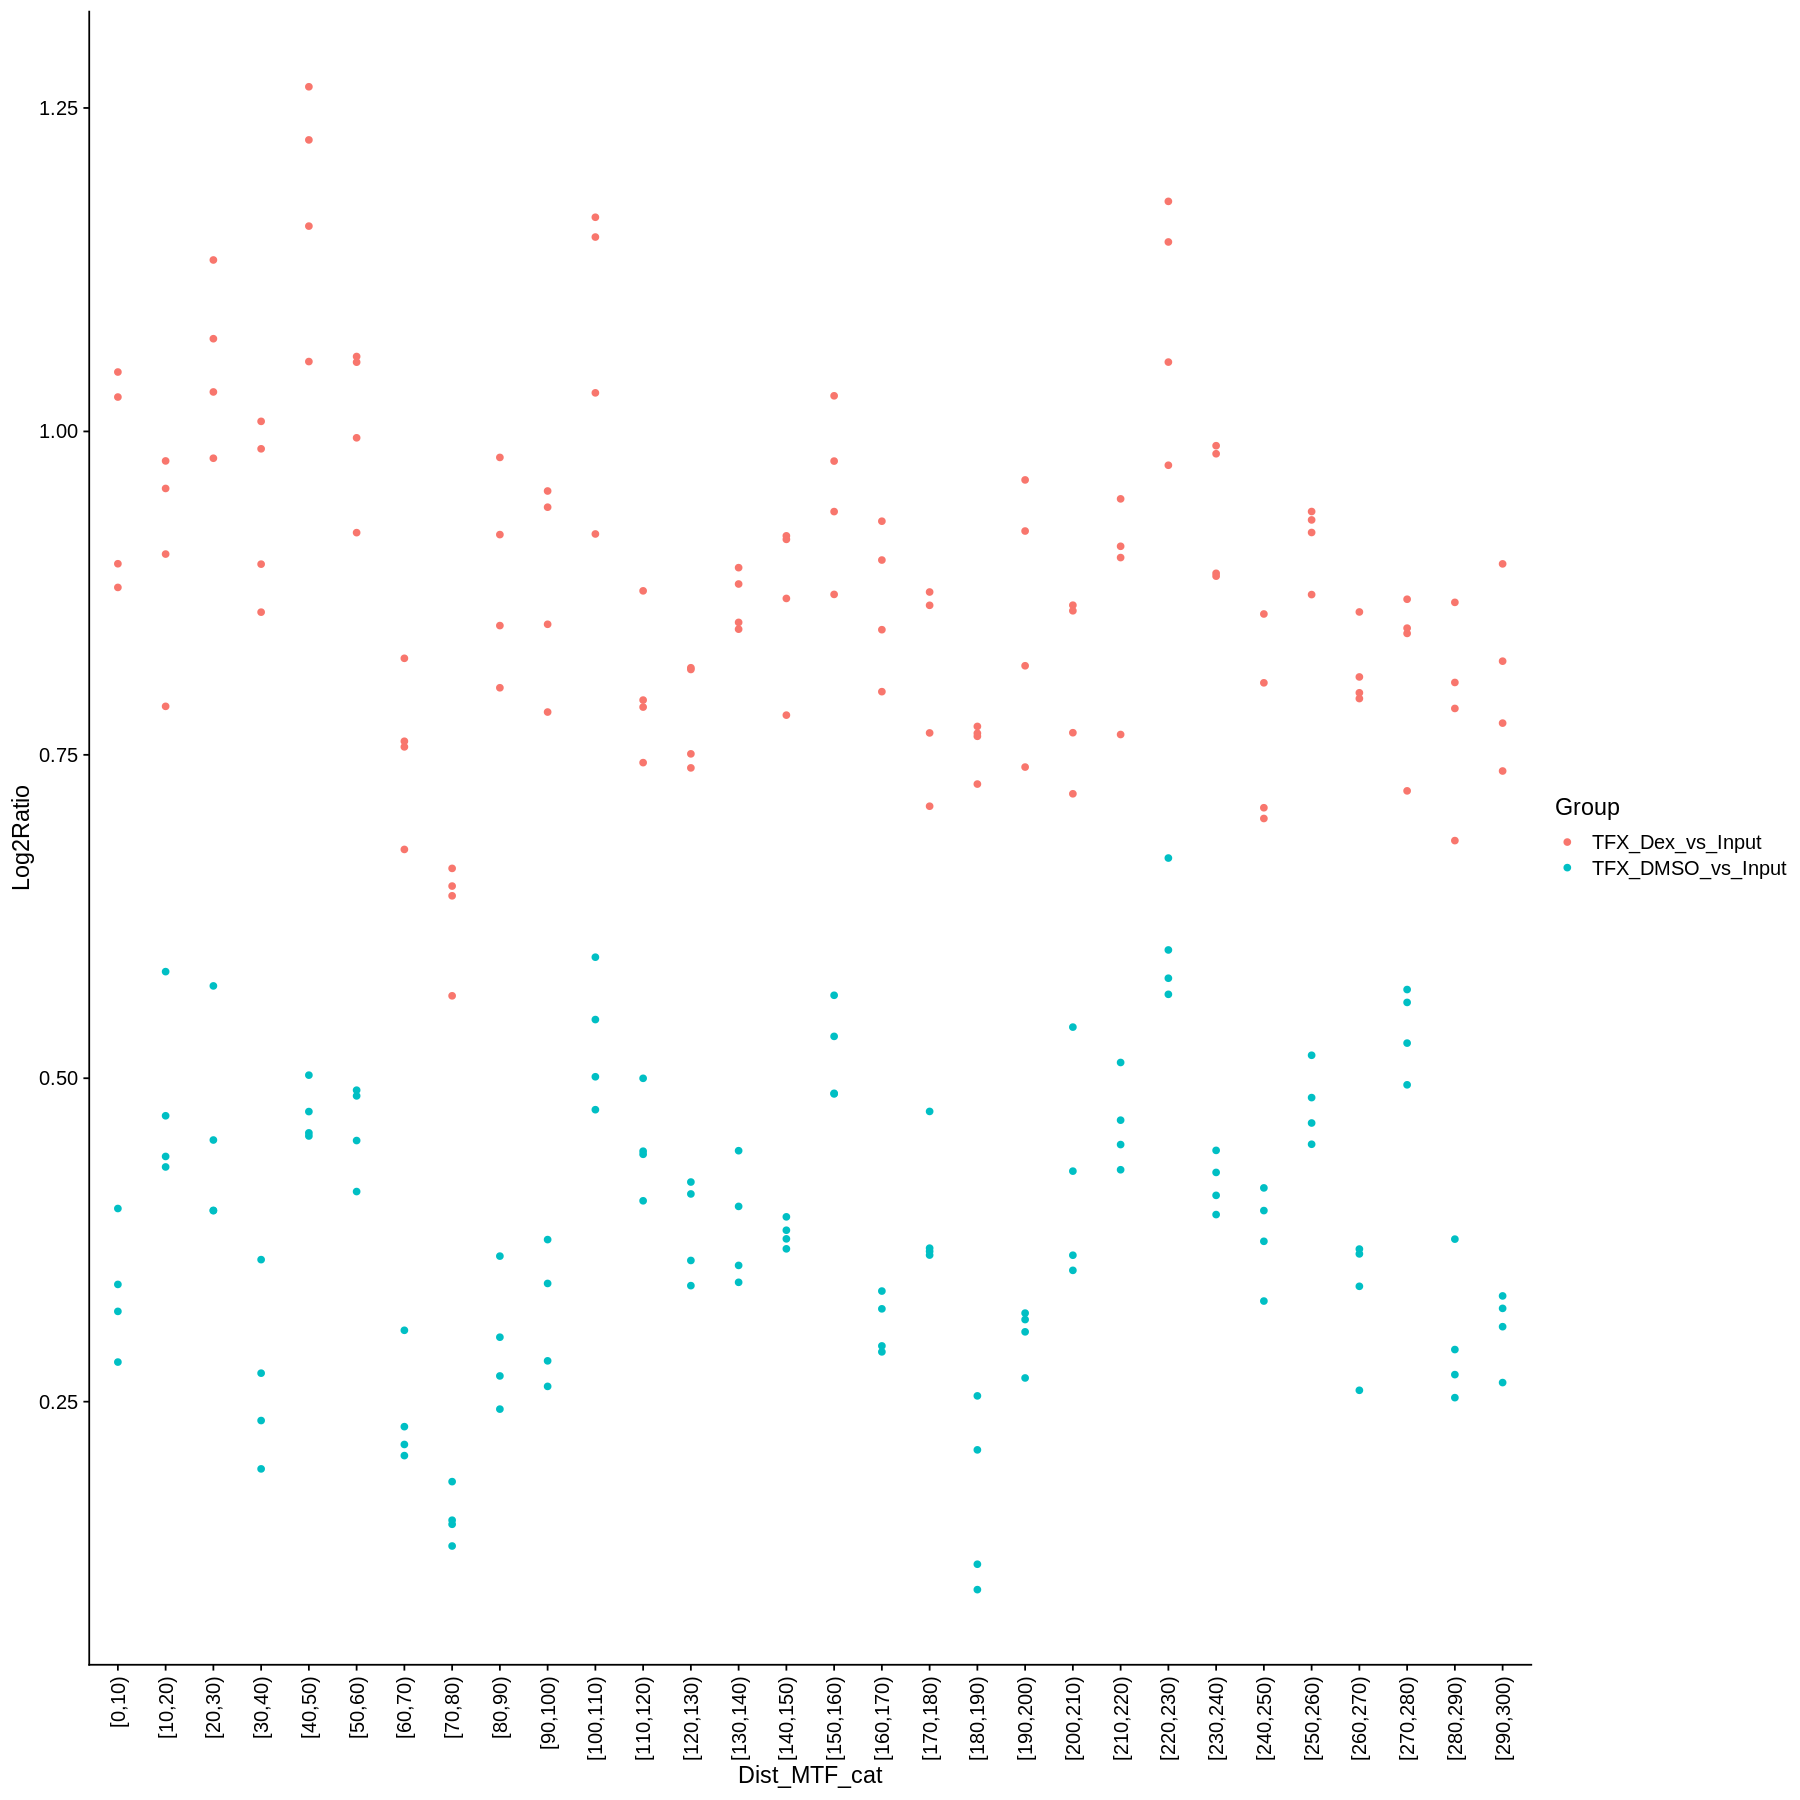

In [185]:
gpt = ggplot(tmp2, aes(x=Dist_MTF_cat, y=Log2Ratio, color=Group, group=Group)) + 
    geom_point() + 
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
print(gpt)

In [139]:
dat = dat1 %>% 
    dplyr::select(Group, Dist_MTF_cat, Norm_Value) %>%
    spread(Group, Norm_Value) %>% 
    mutate(DMSO_vs_Input = TFX_DMSO / Input,
           Dex_vs_Input  = TFX_Dex  / Input,
           Dex_vs_DMSO   = TFX_Dex  / TFX_DMSO)
head(dat)

Dist_MTF_cat Input        TFX_Dex      TFX_DMSO     Ratio_DMSO Ratio_Dex
1 [0,10)       0.0001043770 0.0002036536 0.0001317254 1.262016   1.951136 
2 [10,20)      0.0002240567 0.0004205121 0.0003130171 1.397045   1.876811 
3 [20,30)      0.0002334719 0.0004849453 0.0003203827 1.372254   2.077104 
4 [30,40)      0.0002450763 0.0004699546 0.0002950195 1.203786   1.917585 
5 [40,50)      0.0002831141 0.0006407233 0.0003928425 1.387577   2.263128 
6 [50,60)      0.0002220229 0.0004465455 0.0003055495 1.376207   2.011259 
  Ratio_Out
1 1.546047 
2 1.343416 
3 1.513644 
4 1.592961 
5 1.630993 
6 1.461451

In [140]:
dat = dat %>% 
    dplyr::select(Dist_MTF_cat, Ratio_DMSO, Ratio_Dex, Ratio_Out) %>%
    gather(Group, Ratio, -Dist_MTF_cat) %>% na.omit
head(dat)

Dist_MTF_cat Group      Ratio   
1 [0,10)       Ratio_DMSO 1.262016
2 [10,20)      Ratio_DMSO 1.397045
3 [20,30)      Ratio_DMSO 1.372254
4 [30,40)      Ratio_DMSO 1.203786
5 [40,50)      Ratio_DMSO 1.387577
6 [50,60)      Ratio_DMSO 1.376207

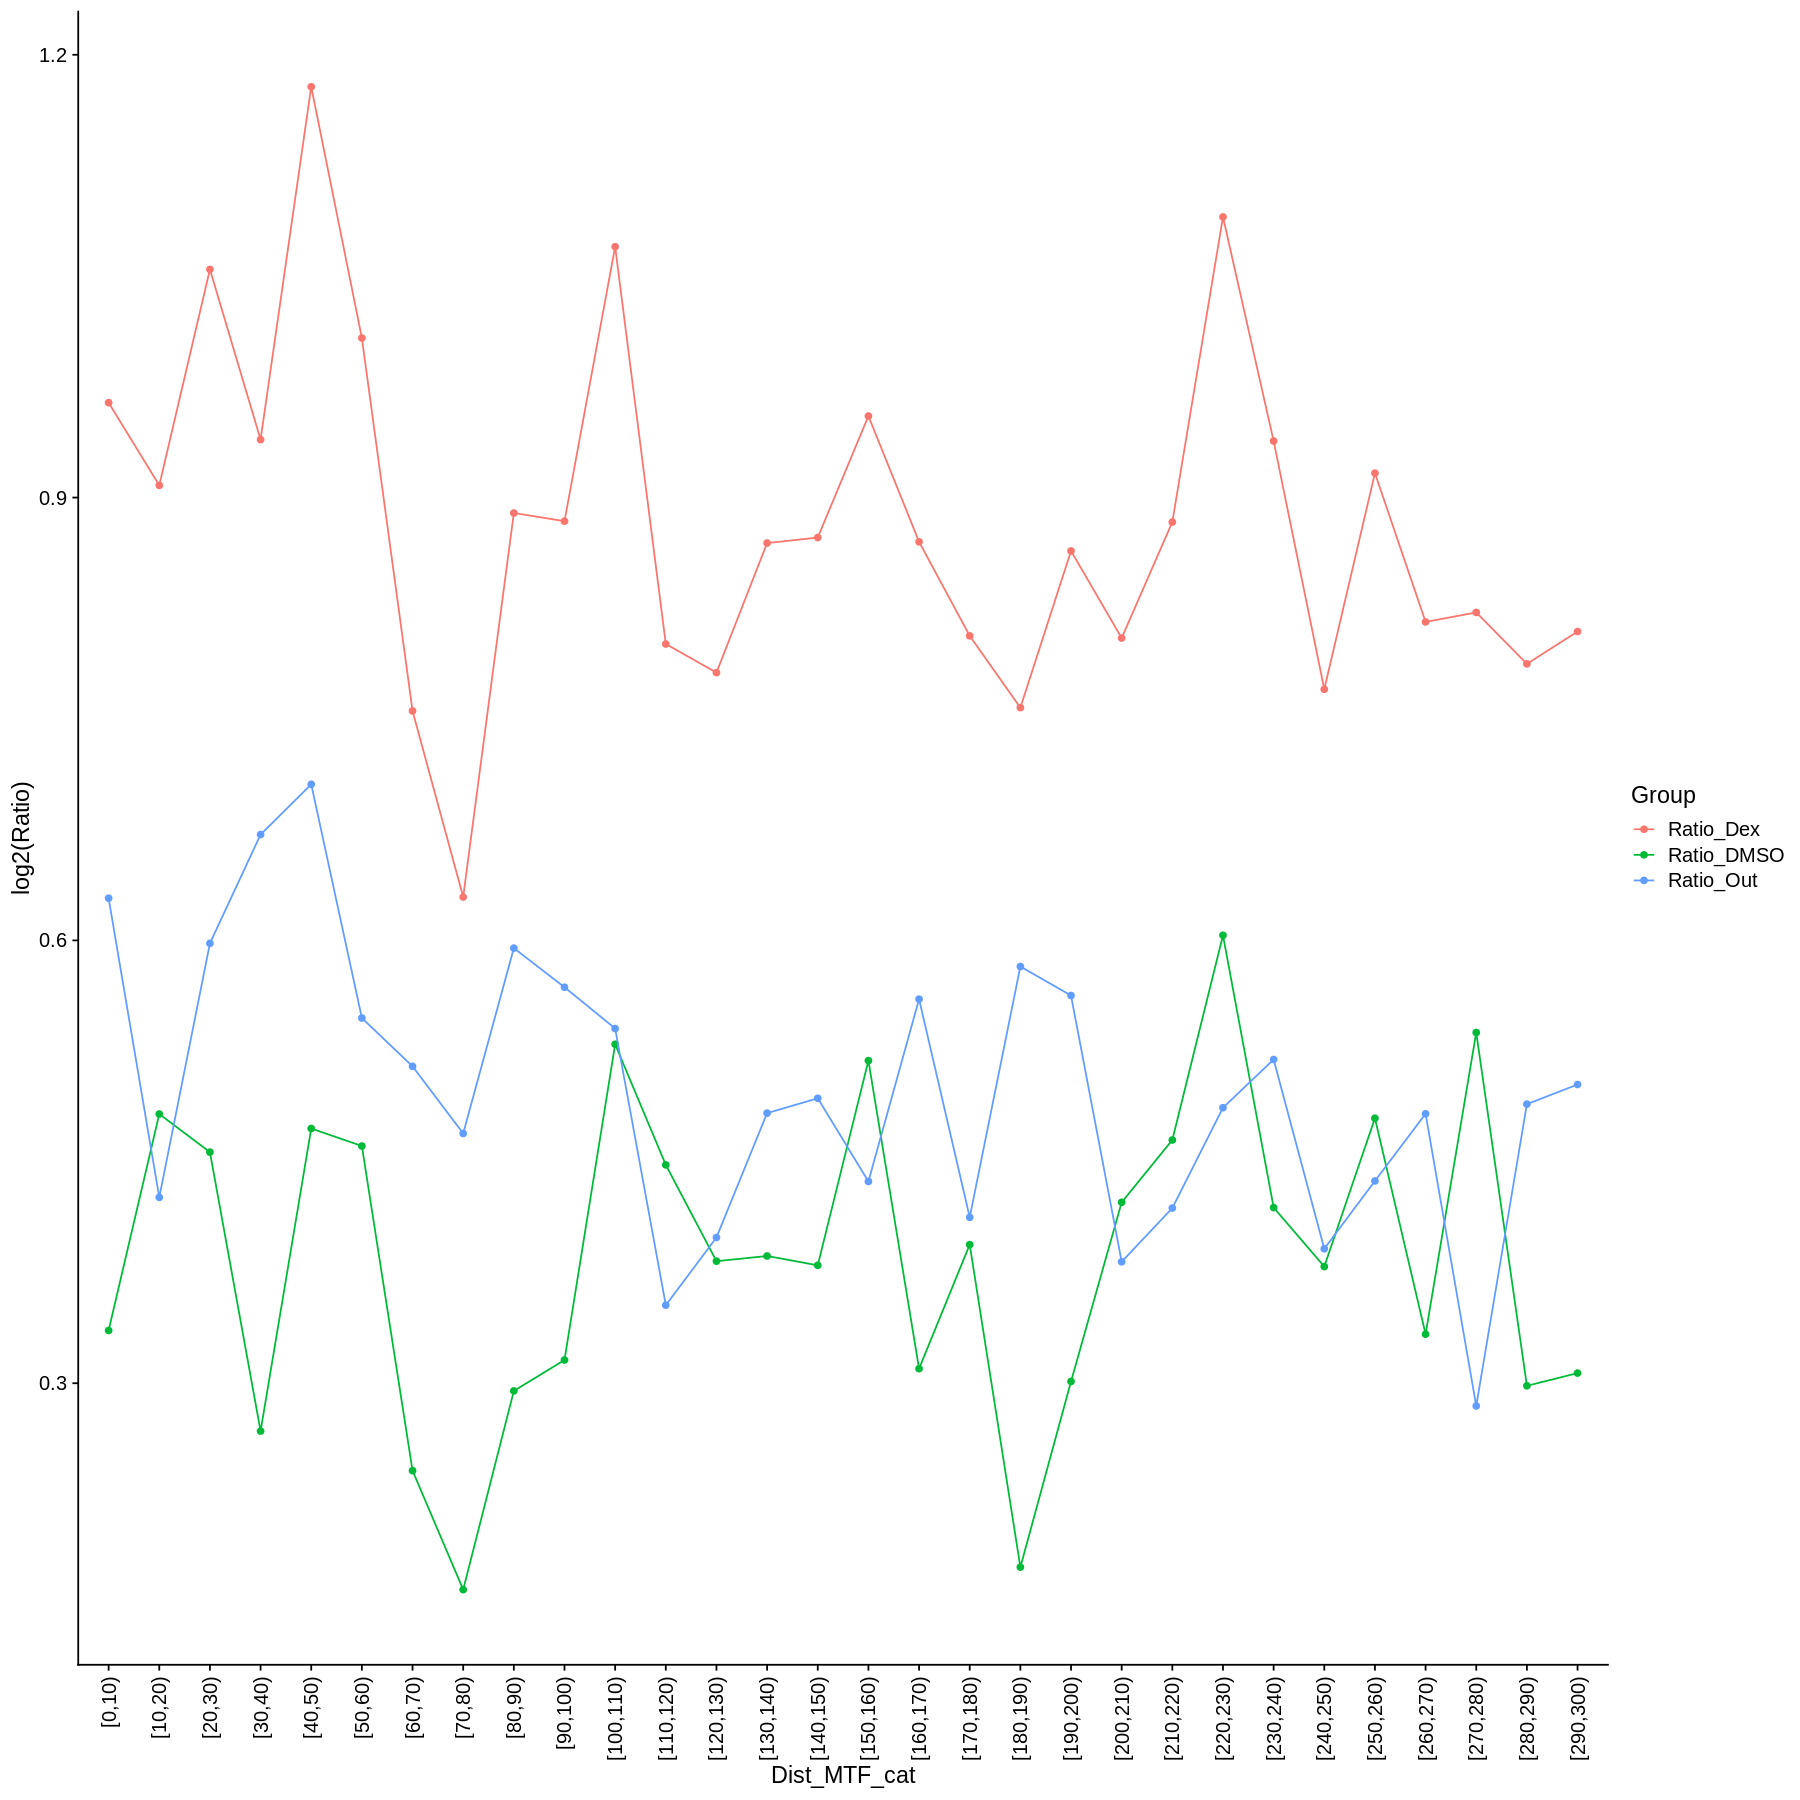

In [141]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat, y=log2(Ratio), color=Group, group=Group)) + 
    geom_point() + 
    geom_line() +
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
print(gpt)

In [ ]:
gp1 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Value, color=Group))
gp2 = ggplot(dat2, aes(x=Dist_MTF_cat2, y=Value, color=Group))
gp3 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Norm_Value, color=Group))
gp4 = ggplot(dat2, aes(x=Dist_MTF_cat2, y=Norm_Value, color=Group))
gp5 = ggplot(dat1, aes(x=Dist_MTF_cat1, y=Lognorm_Value, color=Group))
gp6 = ggplot(dat2, aes(x=Dist_MTF_cat2, y=Lognorm_Value, color=Group))

lst_gpt = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst_gpt = lapply(lst_gpt, function(gpt){
    gpt = gpt +
        geom_point() + 
        theme_cowplot() +
        theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
})

ERROR: Error in FUN(X[[i]], ...): object 'Dist_MTF_cat2' not found


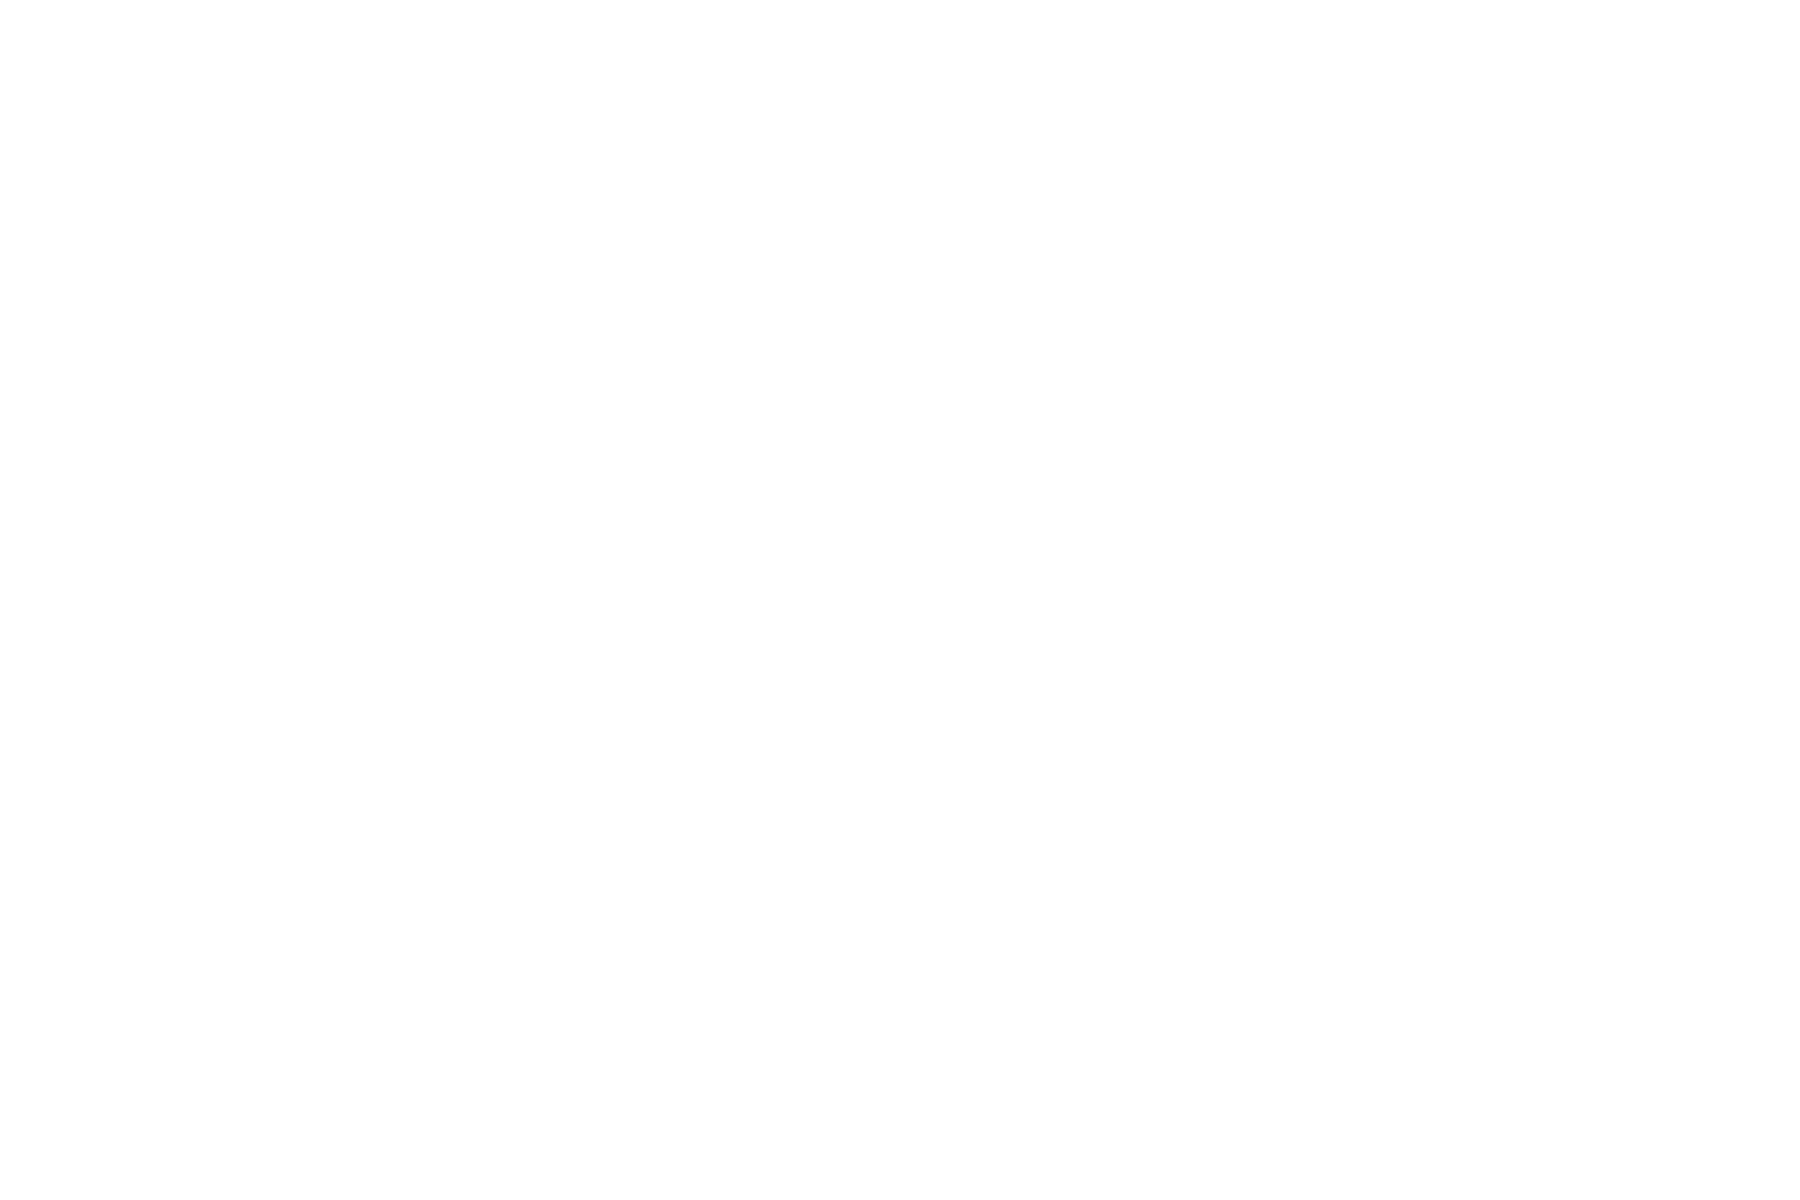

In [45]:
gpt = ggplot(dat, aes(x=Dist_MTF_cat2, y=Lognorm_Value, color=Group)) + 
    geom_point() + 
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5,hjust=1,angle=90))
print(gpt)

In [ ]:
dat = dat_test %>%
    group_by(Sample, Group, Dist_MTF_cat1) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop') %>%

In [ ]:
dat1 = dat_test %>%
    group_by(Sample, Group, Dist_MTF_cat1) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop')

dat2 = dat_test %>%
    group_by(Sample, Group, Dist_MTF_cat2) %>% 
    summarise(Value = sum(Count_Frag), .groups = 'drop')